# Install required packages

In [6]:
#pip install seaborn
#!conda uninstall matplotlib
#!pip install matplotlib
#pip install matplotlib==3.4.1

## Import required packages

In [7]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

## API

Your api key can be found here: https://open.fda.gov/apis/authentication/

In [9]:
# Insert your API key in the string('') below that is obtained from above link 

api_key = ''

## Run the below functions

In [10]:
import pandas as pd
import numpy as np
import requests
from pathlib import Path  

def maude_extract_by_manu(manufacture_name = None,zip_code=None, product_code = None ,date_start = None, date_end = None, other_para = None, other_para_value = None, limit = 1000):
    URL = "https://api.fda.gov/device/event.json?search="
    if manufacture_name != None:
        URL += f"device.manufacturer_d_name:'{manufacture_name}'"
        if product_code != None:
            URL += f"+AND+device.device_report_product_code:'{product_code}'"
        if zip_code != None:
            URL += f"+AND+device.manufacturer_d_zip_code:'{zip_code}'"
        if (date_start != None) and (date_end != None):
            URL += f"+AND+date_received:[{date_start}+TO+{date_end}]"
        if (other_para != None) and (other_para_value != None):
            URL += f"+AND+{other_para}:'{other_para_value}'"
            
    URL += f"&limit={limit}"
    json_data = requests.get(URL).json()
    data = pd.json_normalize(json_data,'results')
    
    if json_data['meta']['results']['total'] > 1000:
        skip_data = pd.DataFrame()
        num = 1000
        while num < json_data['meta']['results']['total']:
            TEM_URL = URL + f"&skip={num}"
            skip_json_data = requests.get(TEM_URL).json()
            try:
                TEM_data = pd.json_normalize(skip_json_data,'results')
                skip_data = pd.concat([skip_data,TEM_data])
            except KeyError:
                pass
            num += 1000
        return skip_data
    if 'skip_data' in globals():
        data.append(skip_data)
    
    return data

In [11]:
def maude_extract_by_manu_api(api_key ,manufacture_name = None, zip_code = None ,product_code = None ,date_start = None, date_end = None, other_para = None, other_para_value = None, limit = 1000):
    URL = "https://api.fda.gov/device/event.json?"
    URL += f"api_key={api_key}&search="
    if manufacture_name != None:
        URL += f"device.manufacturer_d_name.exact:'{manufacture_name}'"
        if zip_code != None:
            URL += f"+AND+device.manufacturer_d_zip_code:'{zip_code}'"
        if product_code != None:
            URL += f"+AND+device.device_report_product_code:'{product_code}'"
        if (date_start != None) and (date_end != None):
            URL += f"+AND+date_received:[{date_start}+TO+{date_end}]"
        if (other_para != None) and (other_para_value != None):
            URL += f"+AND+{other_para}:'{other_para_value}'"
            
    URL += f"&limit={limit}"
    json_data = requests.get(URL).json()
    data = pd.json_normalize(json_data,'results')
    

    if json_data['meta']['results']['total'] > 1000:
        skip_data = pd.DataFrame()
        num = 1000
        while num < json_data['meta']['results']['total']:
            TEM_URL = URL + f"&skip={num}"
            skip_json_data = requests.get(TEM_URL).json()
            try:
                TEM_data = pd.json_normalize(skip_json_data,'results')
                skip_data = pd.concat([skip_data,TEM_data])
            except KeyError:
                pass
            num += 1000
        return skip_data
    if 'skip_data' in globals():
        data.append(skip_data)
    
    return data

In [12]:
def maude_extract_by_product(product_code = None ,date_start = None, date_end = None, other_para = None, other_para_value = None, limit = 1000):
    URL = "https://api.fda.gov/device/event.json?search="
    if product_code != None:
        URL += f"device.device_report_product_code:'{product_code}'"
        if (date_start != None) and (date_end != None):
            URL += f"+AND+date_received:[{date_start}+TO+{date_end}]"
        if (other_para != None) and (other_para_value != None):
            URL += f"+AND+{other_para}:'{other_para_value}'"
            
    URL += f"&limit={limit}"
    json_data = requests.get(URL).json()
    data = pd.json_normalize(json_data,'results')
    

    if json_data['meta']['results']['total'] > 1000:
        skip_data = pd.DataFrame()
        num = 1000
        while num < json_data['meta']['results']['total']:
            TEM_URL = URL + f"&skip={num}"
            skip_json_data = requests.get(TEM_URL).json()
            try:
                TEM_data = pd.json_normalize(skip_json_data,'results')
                skip_data = pd.concat([skip_data,TEM_data])
            except KeyError:
                pass
            num += 1000
        return skip_data
    if 'skip_data' in globals():
        data.append(skip_data)
    
    return data

In [13]:
def maude_data(dataframe):
    df = pd.DataFrame()

    data = dataframe
    data.reset_index(drop=True, inplace=True)

    df['report_number'] = data['report_number']
    df['date_of_event'] = data['date_of_event']
    df['event_type'] = data['event_type']
    df['manufacturer_name'] = data['manufacturer_g1_name']
    df['date_received'] = data['date_received']
    df['product_problem'] = data['product_problems']
    df['zip_code'] = data['manufacturer_contact_zip_code']
    for i in range(len(data)):
        if data['device'][i][0]['device_report_product_code'] != None:
            df.loc[i,'product_code'] = data['device'][i][0]['device_report_product_code']
        if data['device'][i][0]['brand_name'] != None:
            df.loc[i,'brand_name'] = data['device'][i][0]['brand_name']
        if data['device'][i][0]['model_number'] != None:
            df.loc[i,'model_number'] = data['device'][i][0]['model_number']
        if(len(data['patient'][i])>0):
            if "patient_problems" in data['patient'][i][0]:
            
                if data['patient'][i][0]['patient_problems'] != None:
                #print(", ".join(data['patient'][i][0]['patient_problems']))
                
                    df.loc[i,'patient_problem'] = ", ".join(data['patient'][i][0]['patient_problems'])
        if len(data['mdr_text'][i]) >= 2:
            for j in range(2):
                if data['mdr_text'][i][j]['text_type_code'] != None:
                    if data['mdr_text'][i][j]['text_type_code'] == 'Additional Manufacturer Narrative':
                        df.loc[i,'Manufacture_Narrative'] = data['mdr_text'][i][j]['text']
                    if data['mdr_text'][i][j]['text_type_code'] == 'Description of Event or Problem':
                        df.loc[i,'Event_Description'] = data['mdr_text'][i][j]['text']
    
    for i in range(len(df)):
        for col in df.columns:
            if df.loc[i,col] == "":
                df.loc[i,col] = None
    df.dropna(subset=['model_number'],inplace=True)
    
    df.reset_index(inplace=True, drop=True)
    df['model_number'] = df['model_number'].astype(str).str[0:4]
    series_ymd_to_y_m_d(dataframe=df, col= 'date_of_event')
    series_ymd_to_y_m_d(dataframe=df, col= 'date_received')
    
    return df

In [14]:
from datetime import datetime

def ymd_to_y_m_d(d):
    return datetime.strptime(d, '%Y%m%d').strftime('%Y-%m-%d')

In [15]:
def series_ymd_to_y_m_d(dataframe, col):

    for i in range(len(dataframe)):
        if isinstance(dataframe.loc[i,col],str) != True:
            dataframe.loc[i,col] = None
    for i in range(len(dataframe)):
        if (dataframe.loc[i,col] != None) and (dataframe.loc[i,col] != ""):
            dataframe.loc[i,col] = ymd_to_y_m_d(dataframe.loc[i,col])

## Extract MAUDE data for Edwards and its competitors 
Values that can be modified below:

    manufacture_name

    date_start

    date_end

In [16]:
maude_edwards = maude_data(maude_extract_by_manu(manufacture_name='Edwards+Lifesciences',date_start = '2018-01-01', date_end = '2022-04-30'))

maude_abbott = maude_data(maude_extract_by_manu(manufacture_name='abbott+laboratories',date_start = '2018-01-01', date_end = '2022-04-30'))

maude_stjude = maude_data(maude_extract_by_manu(manufacture_name='st.+jude',date_start = '2018-01-01', date_end = '2022-04-30'))

maude_medtronic = maude_data(maude_extract_by_manu(manufacture_name='medtronic',date_start = '2018-01-01', date_end = '2022-04-30'))

maude_livanova = maude_data(maude_extract_by_manu(manufacture_name='livanova',date_start = '2018-01-01', date_end = '2022-04-30'))

maude_boston_scientific = maude_data(maude_extract_by_manu(manufacture_name='boston+scientific',date_start = '2018-01-01', date_end = '2022-04-30'))

In [17]:
#Combining all the competitors to analyse the issues in the industry
maude = pd.concat([maude_abbott, maude_stjude, maude_medtronic, maude_livanova, maude_boston_scientific])

In [18]:
maude.head()

,report_number,date_of_event,event_type,manufacturer_name,date_received,product_problem,zip_code,product_code,brand_name,model_number,patient_problem,Event_Description,Manufacture_Narrative
0,2919069-2021-00007,2021-02-01,Malfunction,None,2021-03-04,[Low Test Results],None,GKZ,CELL-DYN RUBY SYSTEM,08H6,"No Clinical Signs, Symptoms or Conditions",THE CUSTOMER REPORTED THAT HE RECEIVED A COMPL...,(B)(4). WAS THIS DEVICE SERVICED BY A THIRD PA...
1,3016438761-2021-00076,2021-02-08,Malfunction,ABBOTT LABORATORIES,2021-03-04,[Low Test Results],60064,JJE,ARCHITECT I2000SR,3M74,"No Clinical Signs, Symptoms or Conditions",THE CUSTOMER STATED THAT MULTIPLE PATIENT RESU...,(B)(4). WAS THIS DEVICE SERVICED BY A THIRD PA...
2,3016438761-2021-00077,2021-02-10,Malfunction,ABBOTT LABORATORIES,2021-03-05,[High Test Results],60064,JJE,ARCHITECT I1000SR,1L86,"No Clinical Signs, Symptoms or Conditions",THE CUSTOMER OBSERVED FALSELY ELEVATED ARCHITE...,HEALTH EFFECT IMPACT CODE: (B)(4). WAS THIS DE...
3,9615742-2021-00459,None,Injury,TISSUE SCIENCE LABORATORIES,2021-03-05,"[Migration or Expulsion of Device, Adverse Eve...",06473,FTM,MESH TSL - PERMACOL,UNKN,"Wound Dehiscence, Fistula, Hernia, Unspecified...",THE PATIENT¿S ATTORNEY ALLEGED A DEFICIENCY AG...,"IF INFORMATION IS PROVIDED IN THE FUTURE, A SU..."
4,9617613-2021-00008,None,Injury,TISSUE SCIENCE LABORATORIES,2021-03-05,[Adverse Event Without Identified Device or Us...,06473,FTM,PERMACOL,P152,"Abscess, Unspecified Infection, Inflammation, ...",THE PATIENT¿S ATTORNEY ALLEGED A DEFICIENCY AG...,"IF INFORMATION IS PROVIDED IN THE FUTURE, A SU..."


# Pre-processing

In [21]:
# Verifying the null values in the data
maude_edwards.isnull().sum()

report_number               0
date_of_event             821
event_type                  0
manufacturer_name        1788
date_received               0
product_problem             3
zip_code                 1731
prodcut_code                0
brand_name                152
model_number                0
patient_problem            10
Manufacture_Narrative    1098
Event_Description        1685
dtype: int64

In [22]:
# Dropping the na values present in manufacturer_name
maude_edwards=maude_edwards.dropna(subset=['manufacturer_name'])
maude=maude.dropna(subset=['manufacturer_name'])

In [23]:
maude.isnull().sum()

report_number               0
date_of_event            4256
event_type                  0
manufacturer_name           0
date_received               0
product_problem             0
zip_code                  758
prodcut_code                0
brand_name                 83
model_number                0
patient_problem             3
Event_Description        6075
Manufacture_Narrative    6122
dtype: int64

In [24]:
maude['manufacturer_name'].value_counts()

MEDTRONIC PUERTO RICO OPERATIONS CO.    21067
INSTITUT STRAUMANN AG                   14397
ST. JUDE MEDICAL, INC.(CRM-SYLMAR)      11098
BOSTON SCIENTIFIC CORPORATION            7041
ST. JUDE MEDICAL - NEUROMODULATION       5096
                                        ...  
OSYPKA MEDICAL GMBH                         1
EDWARDS LIFESCIENCES, PR                    1
TERUMO PUERTO RICO LLC                      1
ST. JUDE MEDICAL, COSTA RICA LTDA.          1
NOBEL BIOCARE USA, LLC                      1
Name: manufacturer_name, Length: 223, dtype: int64

In [25]:
# concatinating and renaming the 
maude.loc[maude['manufacturer_name'].str.contains('Abbott'), 'manufacturer_name'] = 'Abbott Laboratories'
maude.loc[maude['manufacturer_name'].str.contains('ABBOTT'), 'manufacturer_name'] = 'Abbott Laboratories'

maude.loc[maude['manufacturer_name'].str.contains('Boston'), 'manufacturer_name'] = 'Boston Scientific'
maude.loc[maude['manufacturer_name'].str.contains('BOSTON'), 'manufacturer_name'] = 'Boston Scientific'


maude.loc[maude['manufacturer_name'].str.contains('Medtronic'), 'manufacturer_name'] = 'Medtronic'
maude.loc[maude['manufacturer_name'].str.contains('MEDTRONIC'), 'manufacturer_name'] = 'Medtronic'


maude.loc[maude['manufacturer_name'].str.contains('LivaNova'), 'manufacturer_name'] = 'LivaNova'
maude.loc[maude['manufacturer_name'].str.contains('LIVANOVA'), 'manufacturer_name'] = 'LivaNova'


maude.loc[maude['manufacturer_name'].str.contains('ST. JUDE'), 'manufacturer_name'] = 'St. Jude Medical'
maude.loc[maude['manufacturer_name'].str.contains('St. Jude'), 'manufacturer_name'] = 'St. Jude Medical'

In [26]:
maude['manufacturer_name'].value_counts()

Medtronic                               24773
St. Jude Medical                        24440
INSTITUT STRAUMANN AG                   14397
Boston Scientific                        7724
LivaNova                                 7537
                                        ...  
PARKER LABORATORIES, INC                    1
MAGELLAN DIAGNOSTICS, INC.                  1
ROCHE INSTRUMENT CENTER AG TEGIMENTA        1
SYSMEX CORPORATION                          1
NOBEL BIOCARE USA, LLC                      1
Name: manufacturer_name, Length: 129, dtype: int64

In [27]:
comp=['Medtronic','St. Jude Medical','Abbott Laboratories','Boston Scientific','LivaNova']

In [28]:
i=0
appended_data = []
for i in comp:
    Med=maude[maude['manufacturer_name']==i]
    appended_data.append(Med)
appended_data = pd.concat(appended_data)

In [29]:
appended_data

,report_number,date_of_event,event_type,manufacturer_name,date_received,product_problem,zip_code,prodcut_code,brand_name,model_number,patient_problem,Event_Description,Manufacture_Narrative
1656,2025587-2018-02751,2018-09-20,Injury,Medtronic,2018-10-16,"[Gradient Increase, Naturally Worn]",55112,NPV,MELODY TRANSCATHER PULMONARY VALVE,PB10,"Corneal Pannus, Endocarditis",MEDTRONIC RECEIVED INFORMATION THAT APPROXIMAT...,PRODUCT ANALYSIS: NO PRODUCT WAS RETURNED. CON...
1722,1723170-2018-06192,2018-07-28,Death,Medtronic,2018-12-12,[Adverse Event Without Identified Device or Us...,55432,GEX,VISUALASE,9735,"Death, Cognitive Changes, Confusion/ Disorient...","CITATION: ZERVOS TM, ROBIN AM, LEE I. BMJ CASE...",PATIENT IDENTIFIER NOT PROVIDED IN ARTICLE. PA...
15487,3004209178-2020-16185,2019-08-01,Malfunction,Medtronic,2020-09-17,"[Premature Discharge of Battery, Output Problem]",55112,NIK,VIVA S CRT-D,DTBB,No Consequences Or Impact To Patient,IT WAS REPORTED THAT THE CARDIAC RESYNCHRONIZA...,CONCOMITANT MEDICAL PRODUCTS: 7120 ST JUDE LEA...
17136,3004209178-2020-17133,2020-09-18,Injury,Medtronic,2020-10-02,[Premature Discharge of Battery],55112,NIK,VIVA XT CRT-D,DTBA,"No Consequences Or Impact To Patient, No Clini...",IT WAS REPORTED THAT THE CARDIAC RESYNCHRONIZA...,CONCOMITANT MEDICAL PRODUCTS: PRODUCT ID: 1688...
17730,2182207-2020-01036,2020-05-22,Injury,Medtronic,2020-10-08,[Adverse Event Without Identified Device or Us...,55432,LGW,IMPLANTABLE NEUROSTIMULATOR,NEU_,Unspecified Infection,LITERATURE ABSTRACT: THE AUTHORS OBJECTIVE WAS...,"LITERATURE CITATION: RAOUL S, NGUYEN JM, KUHN ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402,1644487-2020-00638,2019-01-14,Malfunction,LivaNova,2020-04-23,[Adverse Event Without Identified Device or Us...,77058,LYJ,PULSE GEN MODEL 106,106,Seizures,NaN,NaN
8403,1644487-2020-00639,2020-02-28,Malfunction,LivaNova,2020-04-23,[Low impedance],77058,LYJ,LEAD MODEL 304,304-,"No Known Impact Or Consequence To Patient, No ...",NaN,NaN
8404,1644487-2020-00641,2019-03-20,Injury,LivaNova,2020-04-23,[Adverse Event Without Identified Device or Us...,77058,LYJ,PULSE GEN MODEL 104,104,Seizures,NaN,NaN
8406,3004478276-2020-00150,2020-03-25,Injury,LivaNova,2020-04-24,[Degraded],None,LWR,MITROFLOW DLA AORTIC PERICARDIAL HEART VALVE,DLA2,"Stroke/CVA, Embolism, Visual Disturbances","ON (B)(6) 2013, A PATIENT RECEIVED A MITROFLOW...","BASED ON THE AVAILABLE INFORMATION, IT APPEARS..."


# Exploratory Analysis

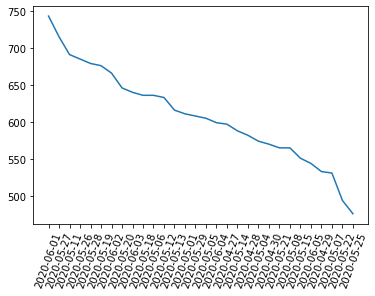

In [30]:
df_group=appended_data.groupby(['date_of_event']).size().sort_values(ascending=False)
plt.xticks(rotation=70)
plt.plot(df_group[0:30].index, df_group[0:30].values)

manufacturer_name
Medtronic              24773
St. Jude Medical       24440
Boston Scientific       7724
LivaNova                7537
Abbott Laboratories      777
dtype: int64


<BarContainer object of 5 artists>

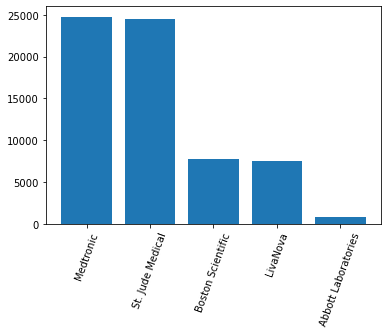

In [31]:
df_group=appended_data.groupby(['manufacturer_name']).size().sort_values(ascending=False)
print(df_group)
plt.xticks(rotation=70)
plt.bar(df_group.index, df_group.values)

In [33]:
Edwards_Productcodes=maude_edwards["product_code"].sort_values(ascending=True).value_counts()
Edwards_Productcodes

NPT    8078
DYE    6845
LWR     632
NPU     473
DXO     234
       ... 
FST       1
FGE       1
DWS       1
DSA       1
QAQ       1
Name: prodcut_code, Length: 64, dtype: int64

In [36]:
appended_data=appended_data[(appended_data['product_code']=='NPT') | (appended_data['product_code']=='DYE') | 
                         (appended_data['product_code']=='LWR') | (appended_data['product_code']=='NPU') |
                        (appended_data['product_code']=='DXO') | (appended_data['product_code']=='DYG') | 
                         (appended_data['product_code']=='DYG') | (appended_data['product_code']=='DXE') |
                        (appended_data['product_code']=='HBL') | (appended_data['product_code']=='DYB') | 
                         (appended_data['product_code']=='DXG') | (appended_data['product_code']=='DQE') |
                        (appended_data['product_code']=='LDF') | (appended_data['product_code']=='LTI') | 
                         (appended_data['product_code']=='NPV') | (appended_data['product_code']=='DQK') |
                        (appended_data['product_code']=='KRH') | (appended_data['product_code']=='DWF') | 
                         (appended_data['product_code']=='DXC') | (appended_data['product_code']=='FWX') |
                        (appended_data['product_code']=='GWM') | (appended_data['product_code']=='DQY') | 
                         (appended_data['product_code']=='JXG') | (appended_data['product_code']=='DXN') |
                        (appended_data['product_code']=='DRS') | (appended_data['product_code']=='CBT') | 
                         (appended_data['product_code']=='MUD') | (appended_data['product_code']=='LFL') |
                        (appended_data['product_code']=='DQO') | (appended_data['product_code']=='KRA') | 
                         (appended_data['product_code']=='DXZ') | (appended_data['product_code']=='PIM') |
                        (appended_data['product_code']=='KRB') | (appended_data['product_code']=='DQR') | 
                         (appended_data['product_code']=='DXF') | (appended_data['product_code']=='FCW') |
                        (appended_data['product_code']=='FSR') | (appended_data['product_code']=='HBF') | 
                         (appended_data['product_code']=='LWQ') | (appended_data['product_code']=='HBA') |
                        (appended_data['product_code']=='FXG') | (appended_data['product_code']=='DTI') | 
                         (appended_data['product_code']=='FOX') | (appended_data['product_code']=='DTB') |
                        (appended_data['product_code']=='OCX') | (appended_data['product_code']=='MAV') | 
                         (appended_data['product_code']=='PAL') | (appended_data['product_code']=='HBM') |
                        (appended_data['product_code']=='PSQ') | (appended_data['product_code']=='MJN') | 
                         (appended_data['product_code']=='FGE') | (appended_data['product_code']=='MDD') |
                        (appended_data['product_code']=='DWS') | (appended_data['product_code']=='KGN') | 
                         (appended_data['product_code']=='LWE') | (appended_data['product_code']=='HNF') |
                        (appended_data['product_code']=='JXI') | (appended_data['product_code']=='GZX') | 
                         (appended_data['product_code']=='GAA') | (appended_data['product_code']=='OZT') |
                        (appended_data['product_code']=='GXQ') | (appended_data['product_code']=='FST') | 
                         (appended_data['product_code']=='QAQ') | (appended_data['product_code']=='DSA') |
                        (appended_data['product_code']=='ISN')]

In [61]:
maude_edwards['product_problem'] = maude_edwards['product_problem']\
                          .astype(str).str.replace(r"[\[\]']", '')
appended_data['product_problem'] = appended_data['product_problem']\
                          .astype(str).str.replace(r"[\[\]']", '')

/var/folders/8k/rhj_zrls501d41qvnkrm5j2r0000gn/T/ipykernel_16597/2447397582.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  maude_edwards['product_problem'] = maude_edwards['product_problem']\
/var/folders/8k/rhj_zrls501d41qvnkrm5j2r0000gn/T/ipykernel_16597/2447397582.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  appended_data['product_problem'] = appended_data['product_problem']\
/var/folders/8k/rhj_zrls501d41qvnkrm5j2r0000gn/T/ipykernel_16597/2447397582.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_data['product_problem'] = appended_data['product_problem']\


/Users/sahithimuddana/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Product Code - Edwards')

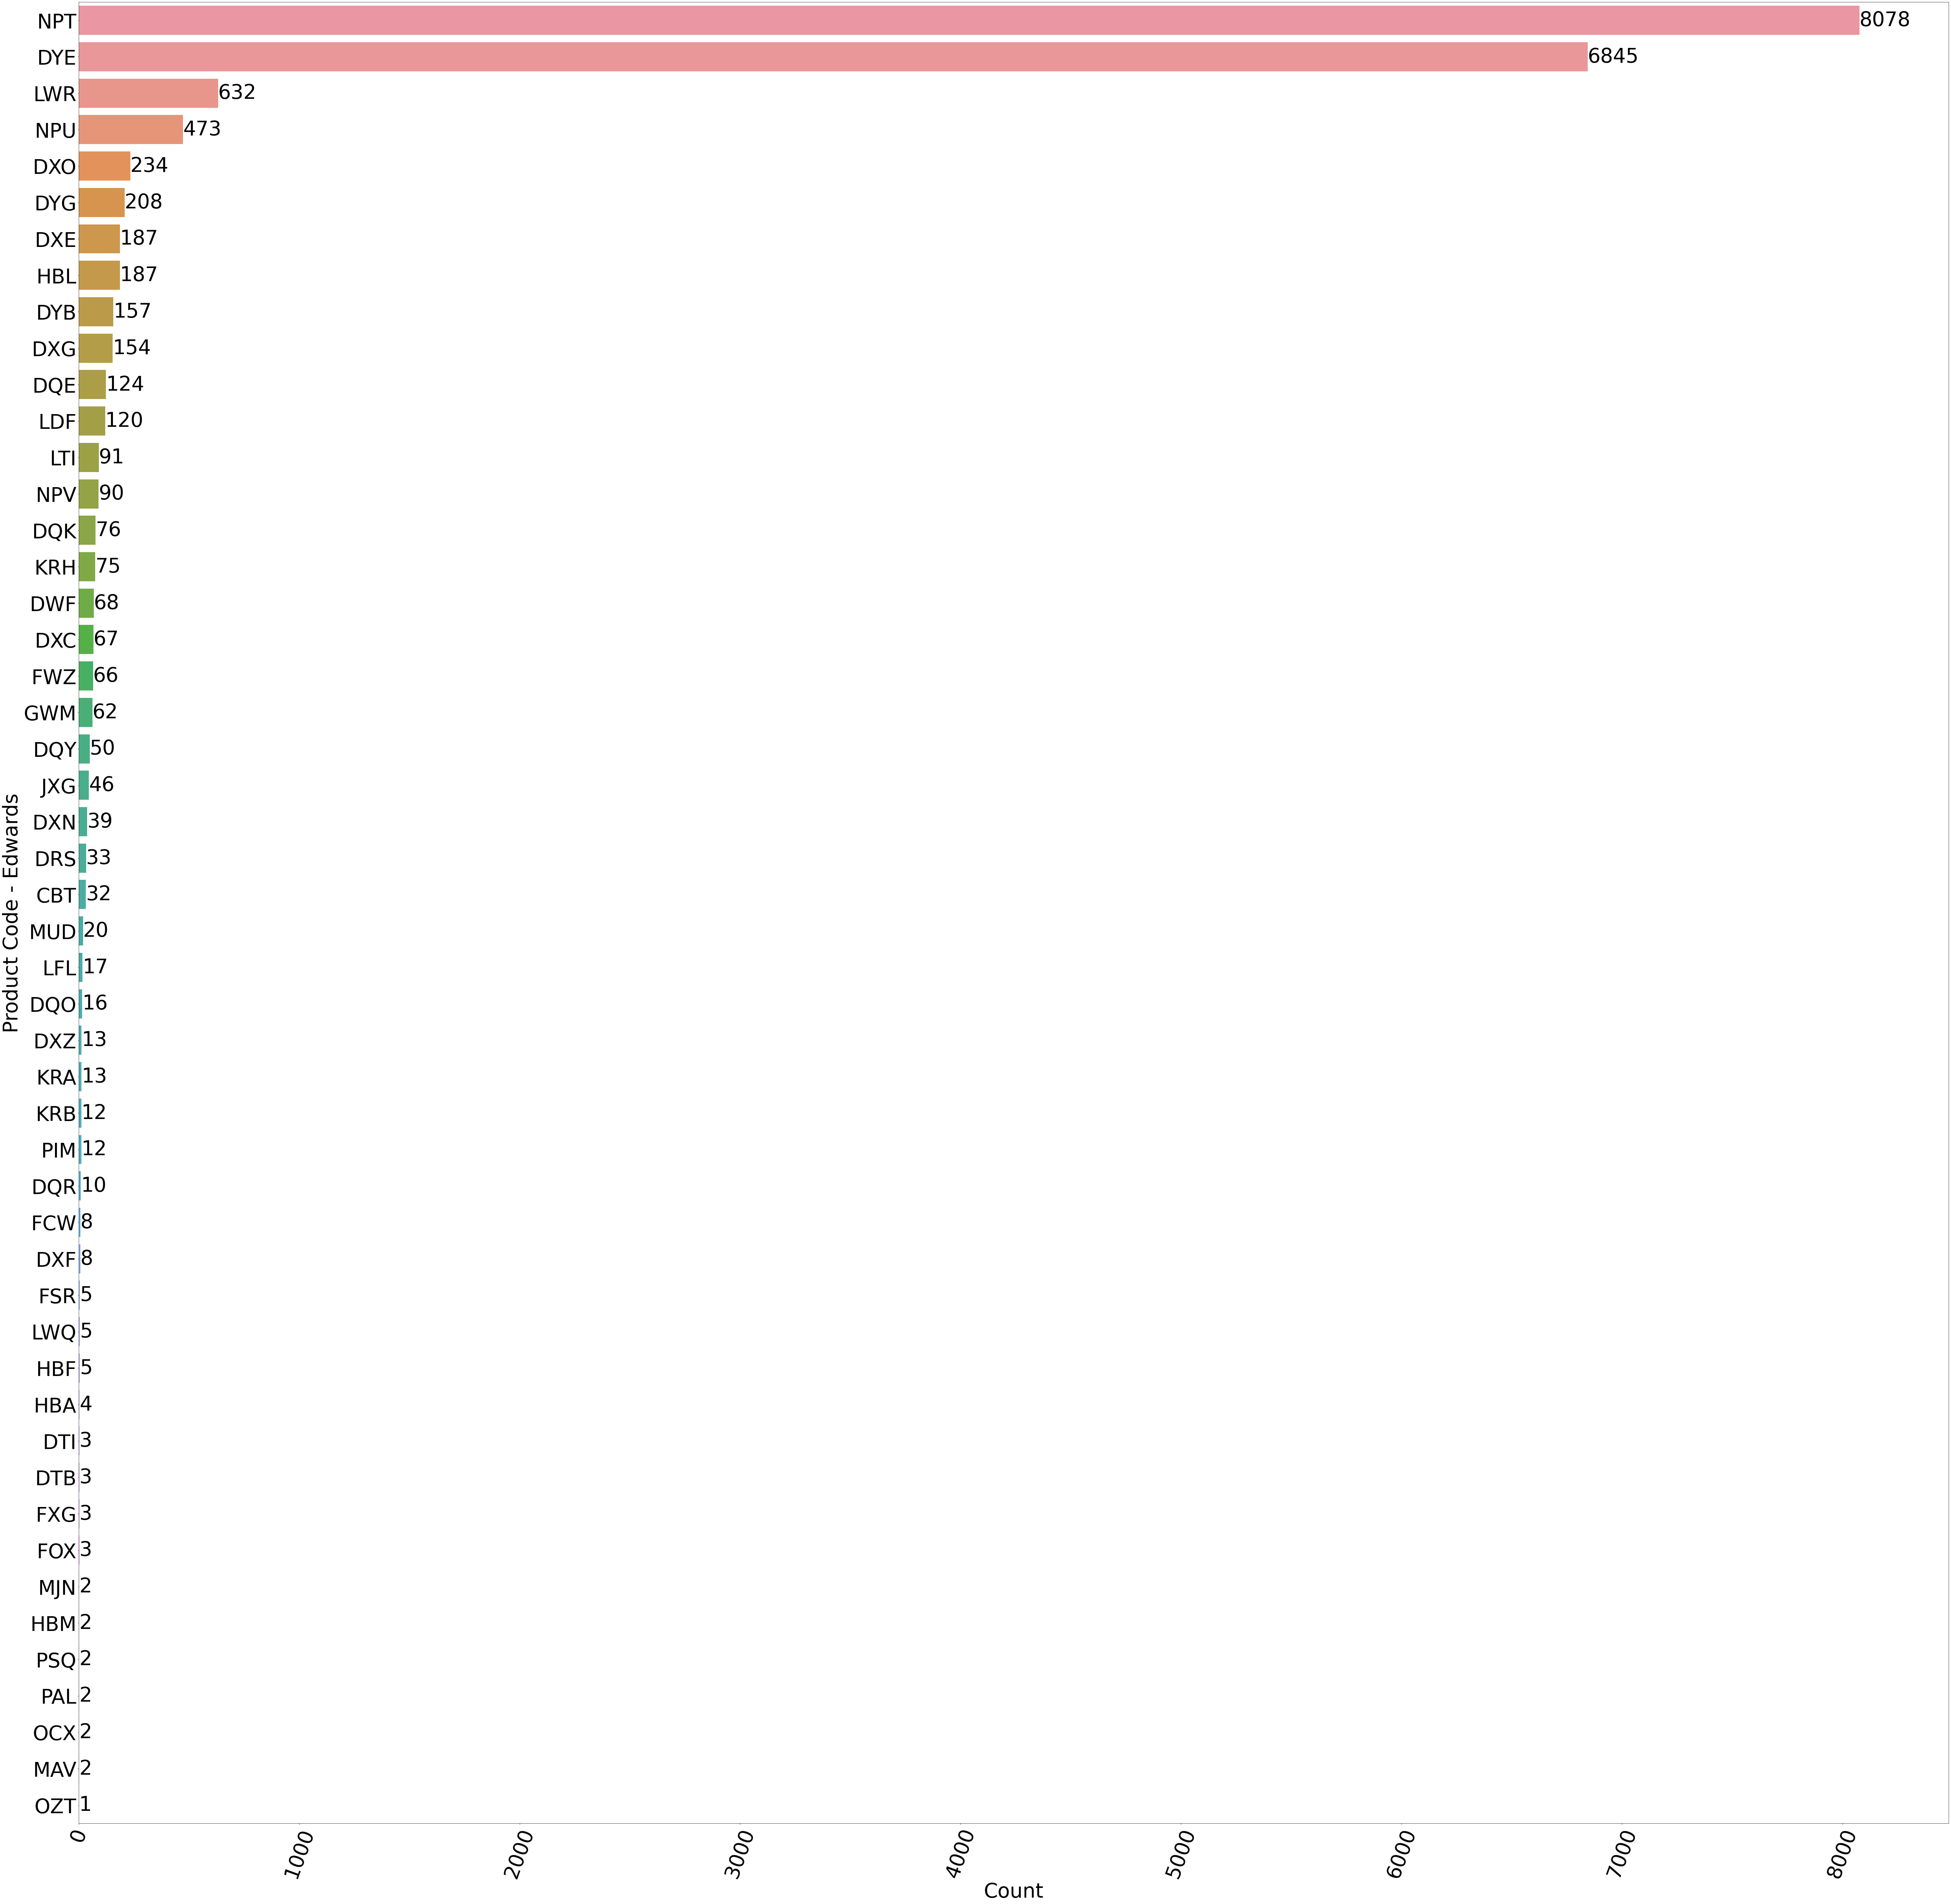

In [67]:
ax=sns.barplot(maude_edwards["product_code"].sort_values(ascending=True).value_counts()[0:50],maude_edwards["product_code"].sort_values(ascending=True).value_counts()[0:50].index)
ax.bar_label(ax.containers[0])
plt.rcParams["figure.figsize"] = (100,100)
plt.rcParams.update({'font.size': 60})
plt.xticks(rotation=70)
plt.xlabel("Count")
plt.ylabel("Product Code - Edwards")

### Insight: 
For Edwards, the most important things to look out for are NPT and DYE, both of which are far more numerous than the others.

/Users/sahithimuddana/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Product Code - Abbott')

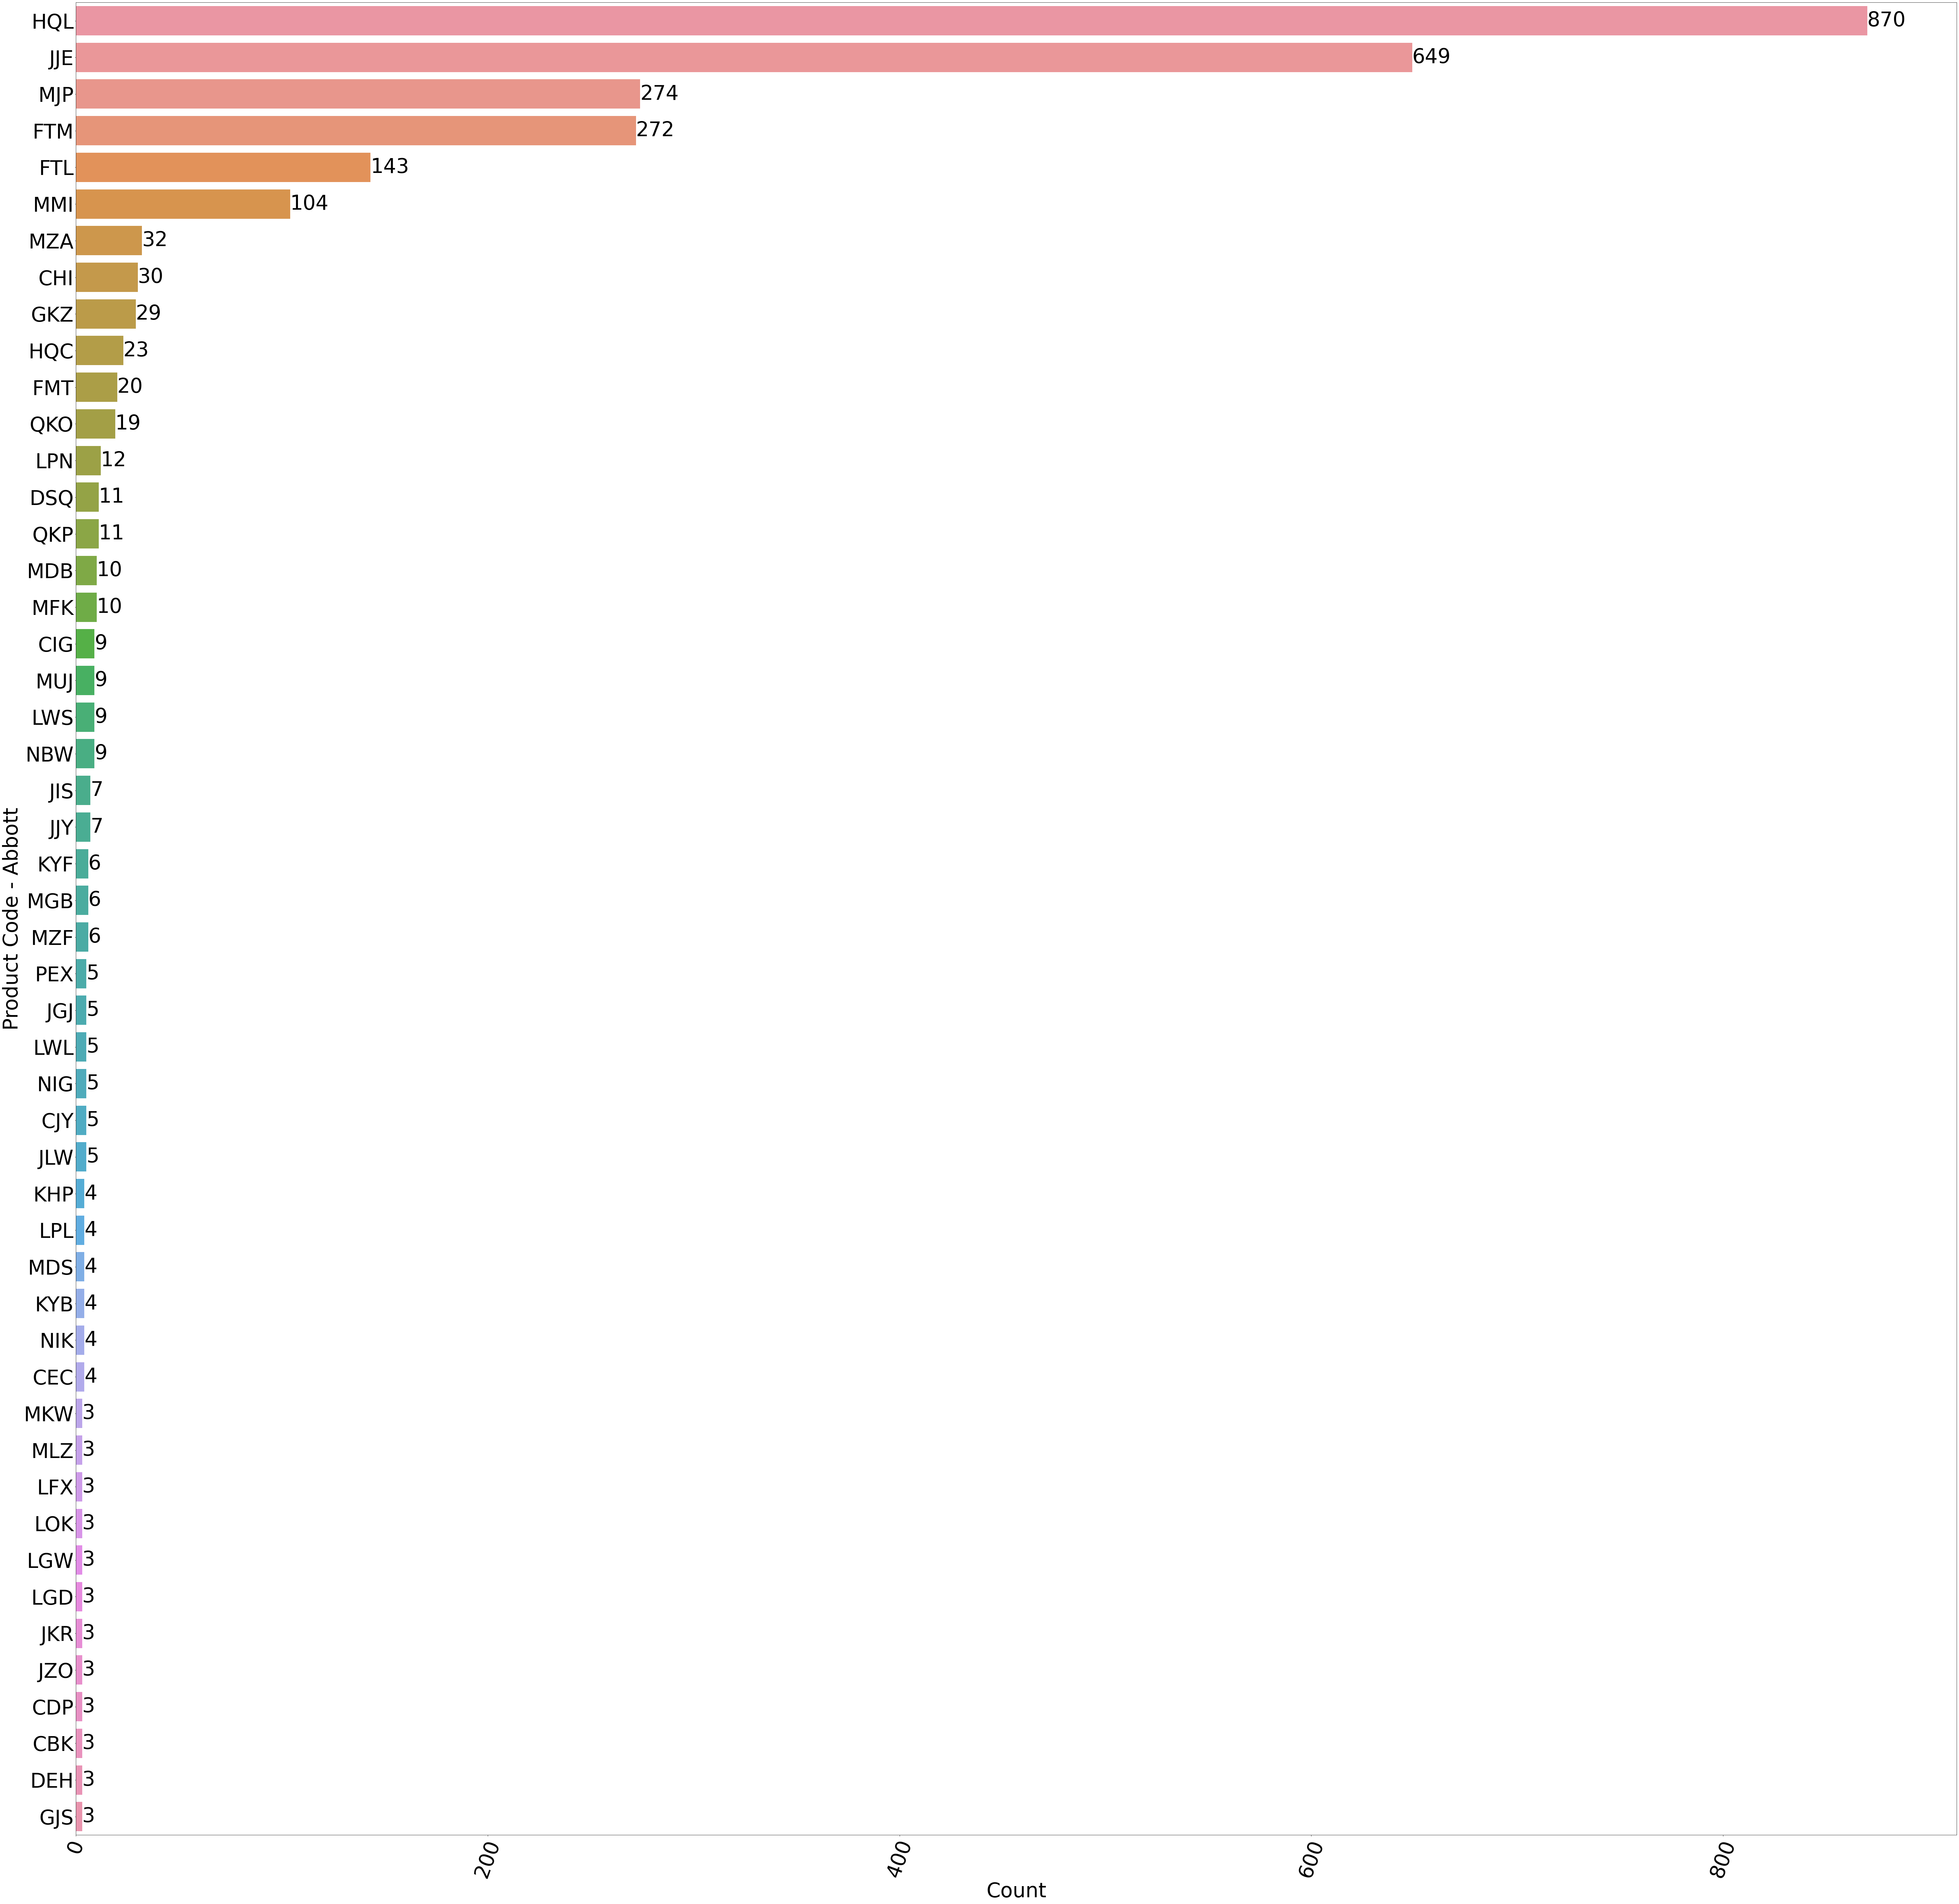

In [68]:
ax=sns.barplot(maude_abbott["product_code"].sort_values(ascending=True).value_counts()[0:50],maude_abbott["product_code"].sort_values(ascending=True).value_counts()[0:50].index)
ax.bar_label(ax.containers[0])
plt.rcParams["figure.figsize"] = (100,100)
plt.rcParams.update({'font.size': 60})
plt.xticks(rotation=70)
plt.xlabel("Count")
plt.ylabel("Product Code - Abbott")

/Users/sahithimuddana/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Product Code - St.Jude')

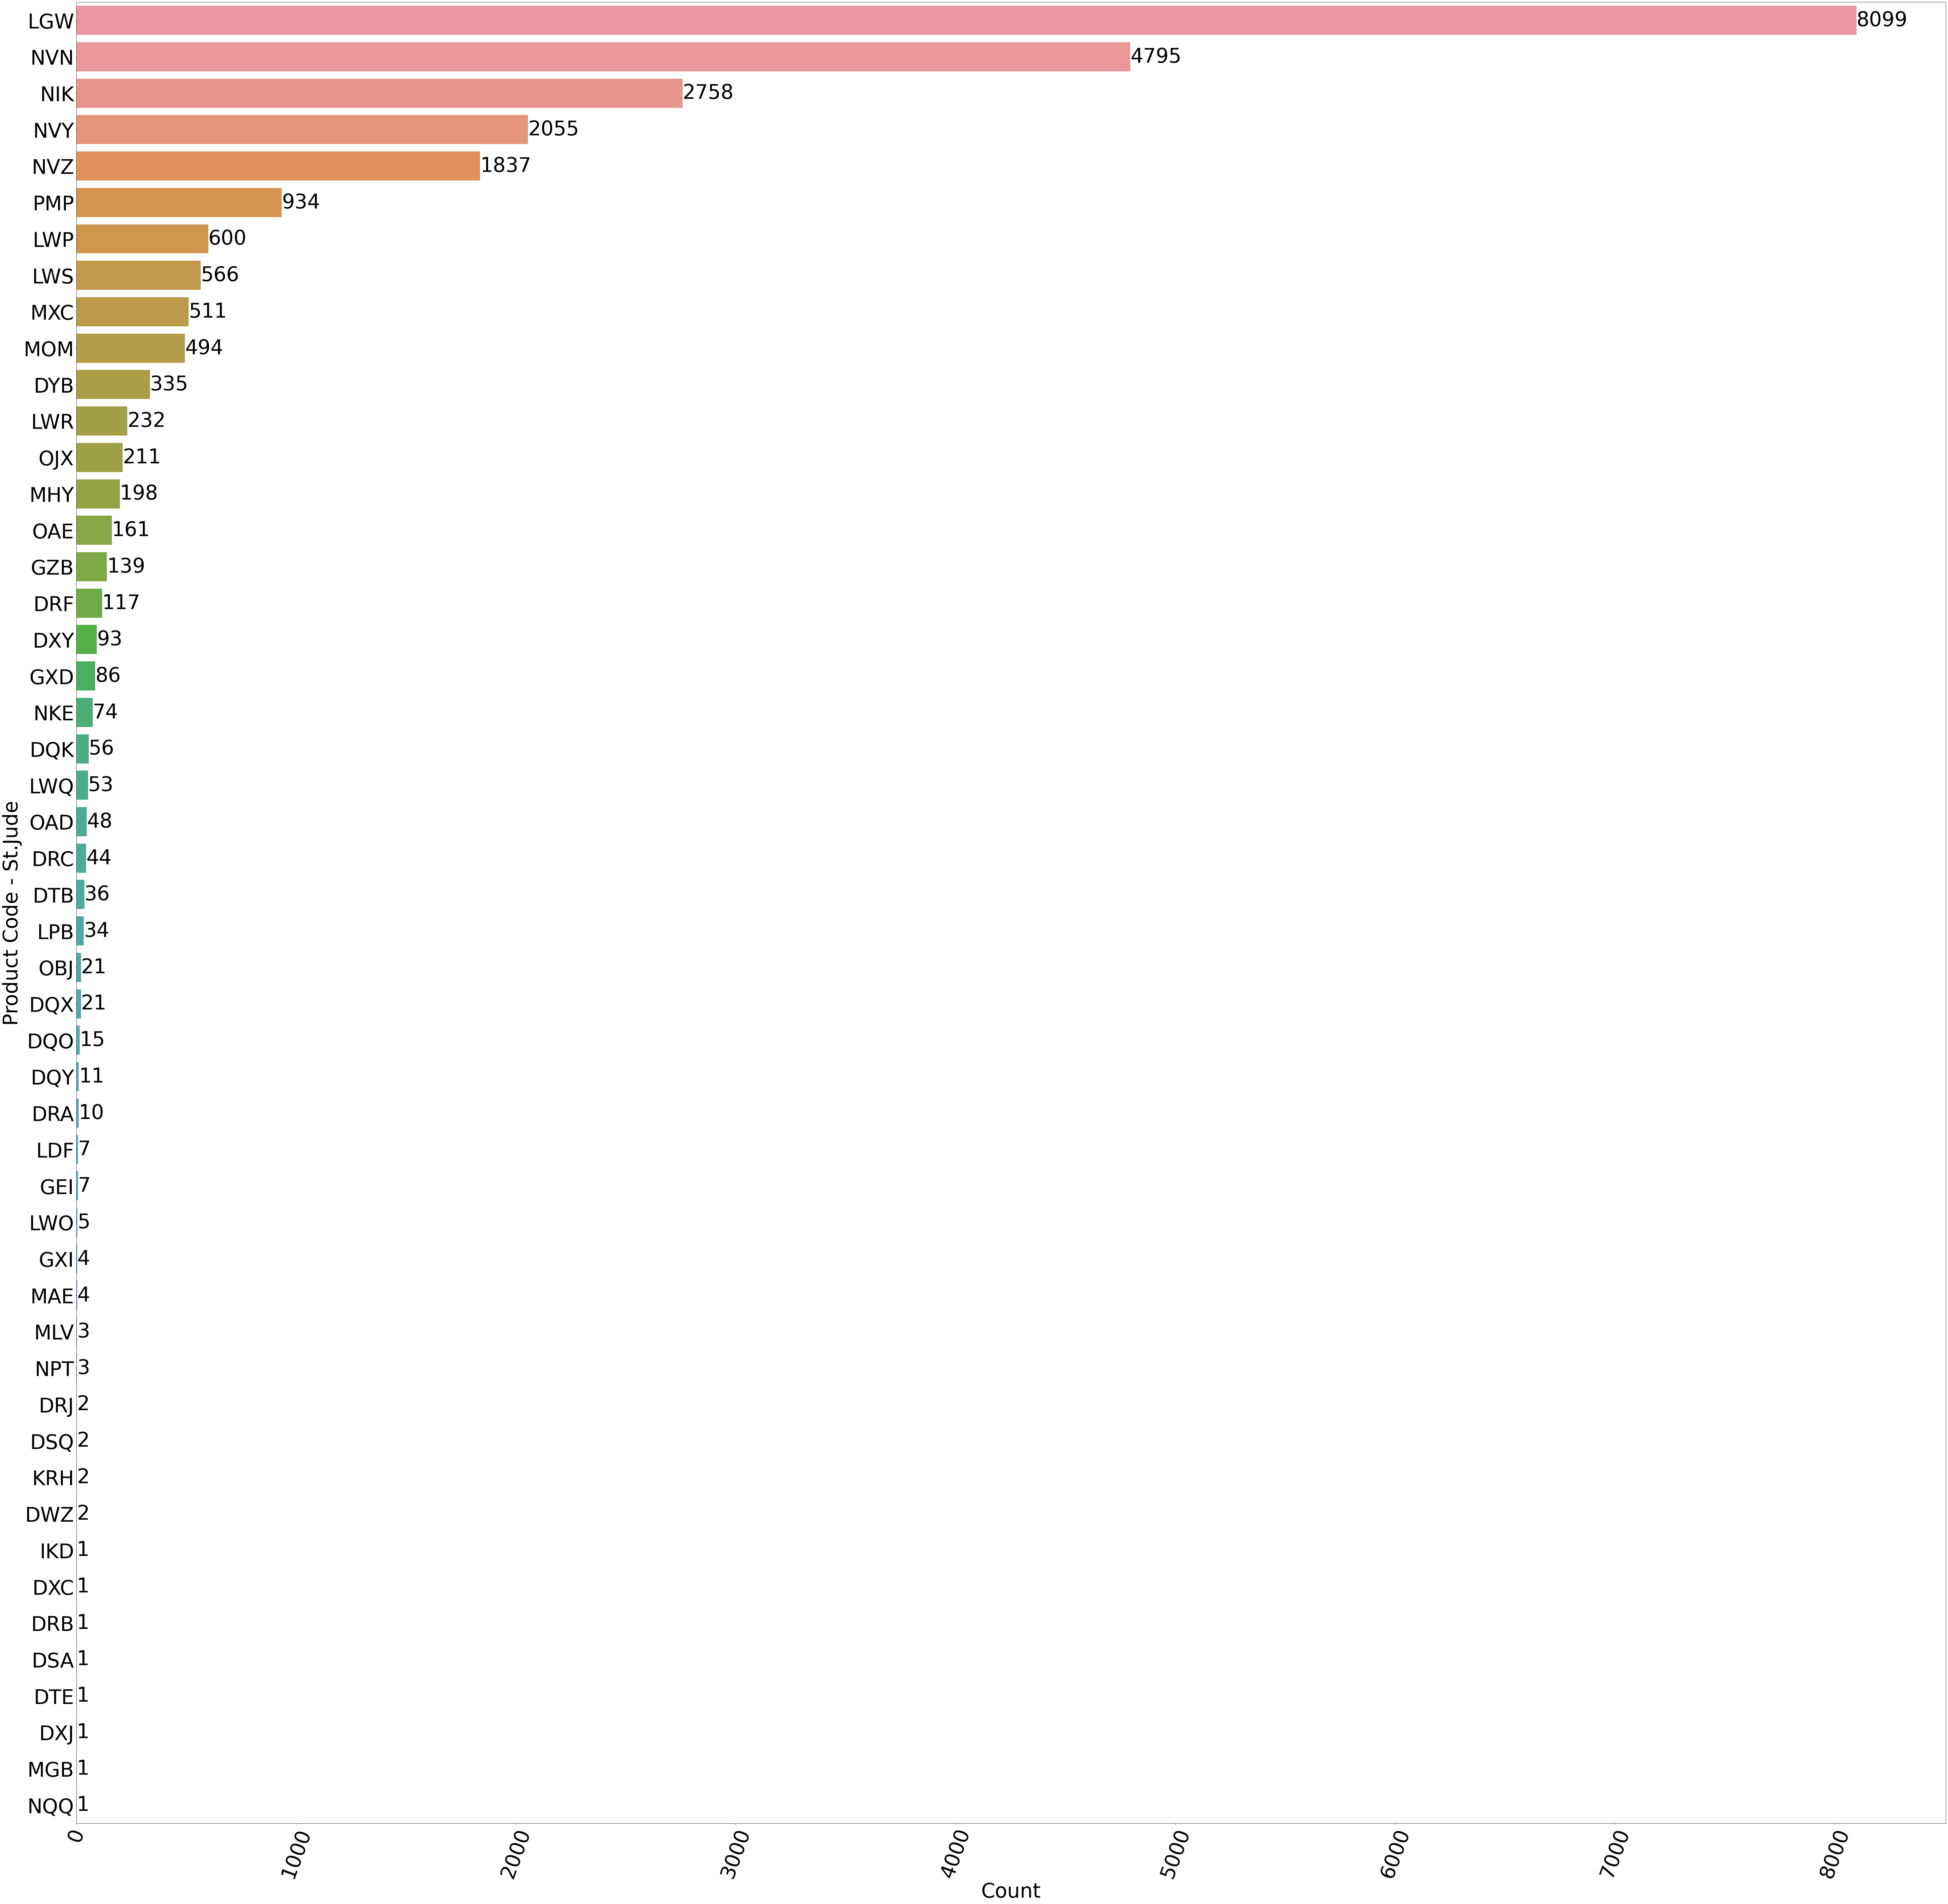

In [69]:
ax=sns.barplot(maude_stjude["product_code"].sort_values(ascending=True).value_counts()[0:50],maude_stjude["product_code"].sort_values(ascending=True).value_counts()[0:50].index)
ax.bar_label(ax.containers[0])
plt.rcParams["figure.figsize"] = (100,100)
plt.rcParams.update({'font.size': 60})
plt.xticks(rotation=70)
plt.xlabel("Count")
plt.ylabel("Product Code - St.Jude")

/Users/sahithimuddana/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Product Code - Medtronic')

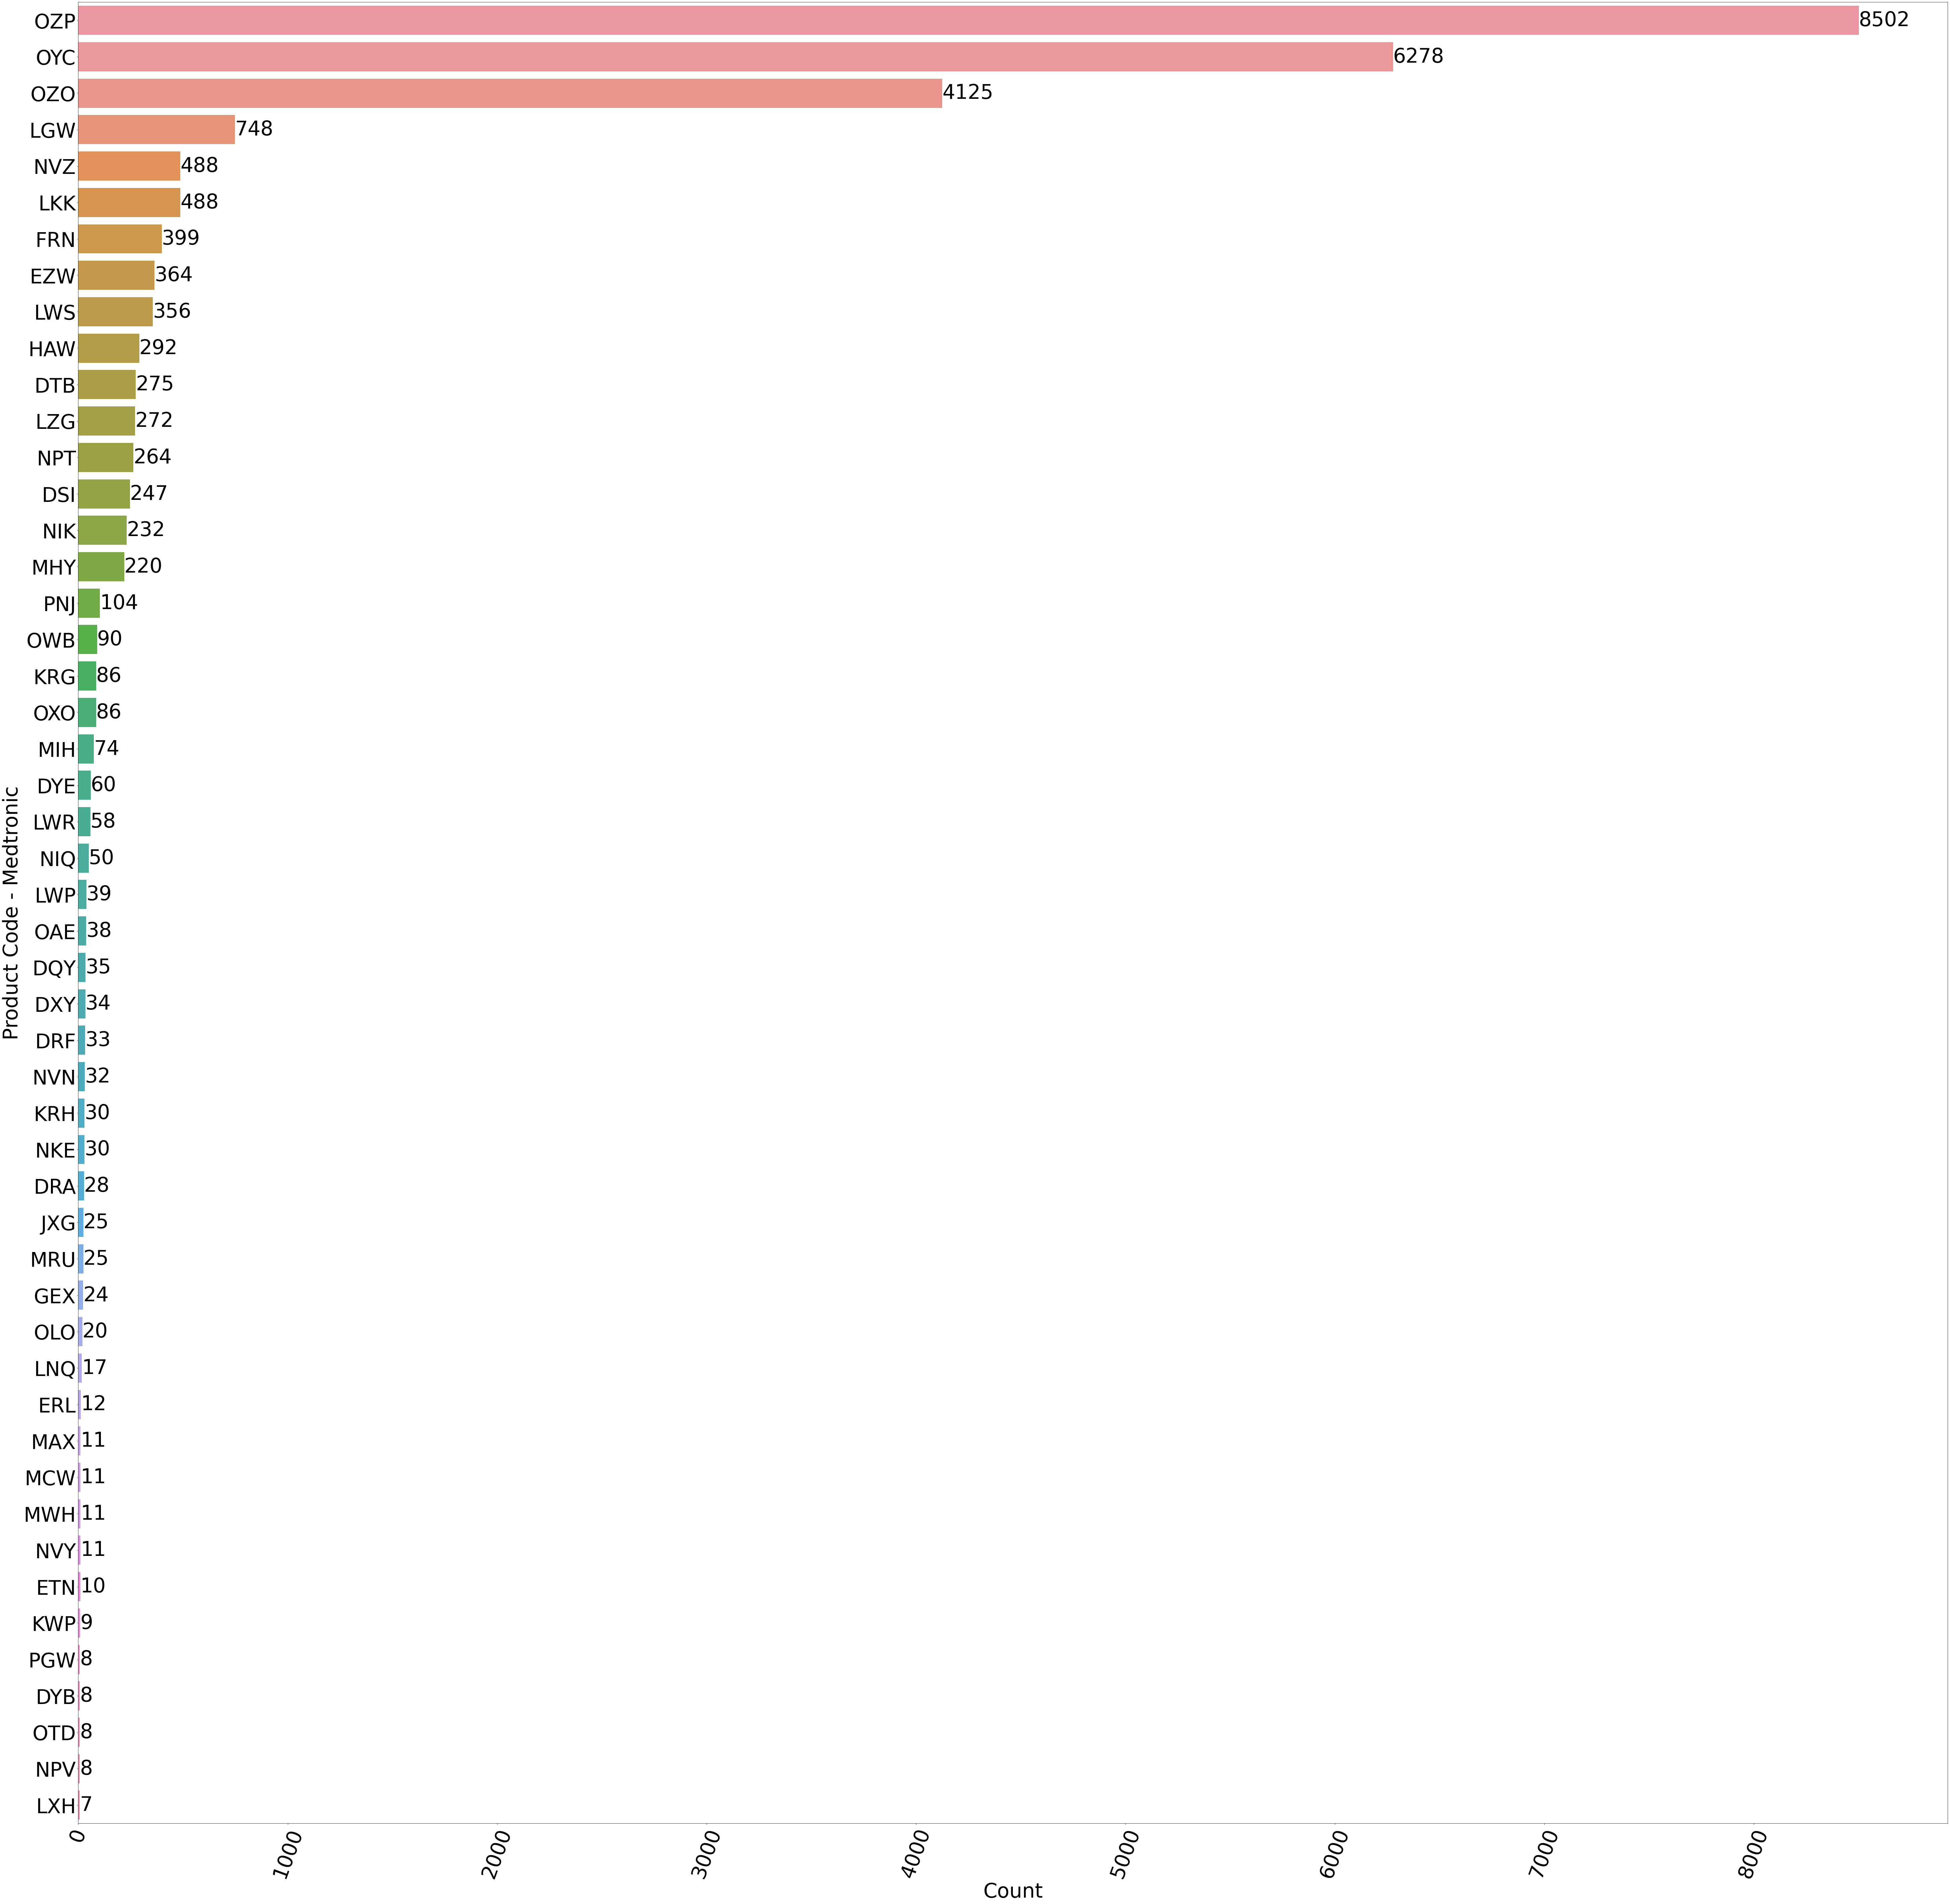

In [70]:
ax=sns.barplot(maude_medtronic["product_code"].sort_values(ascending=True).value_counts()[0:50],maude_medtronic["product_code"].sort_values(ascending=True).value_counts()[0:50].index)
ax.bar_label(ax.containers[0])
plt.rcParams["figure.figsize"] = (100,100)
plt.rcParams.update({'font.size': 60})
plt.xticks(rotation=70)
plt.xlabel("Count")
plt.ylabel("Product Code - Medtronic")

/Users/sahithimuddana/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Product Code - Livanova')

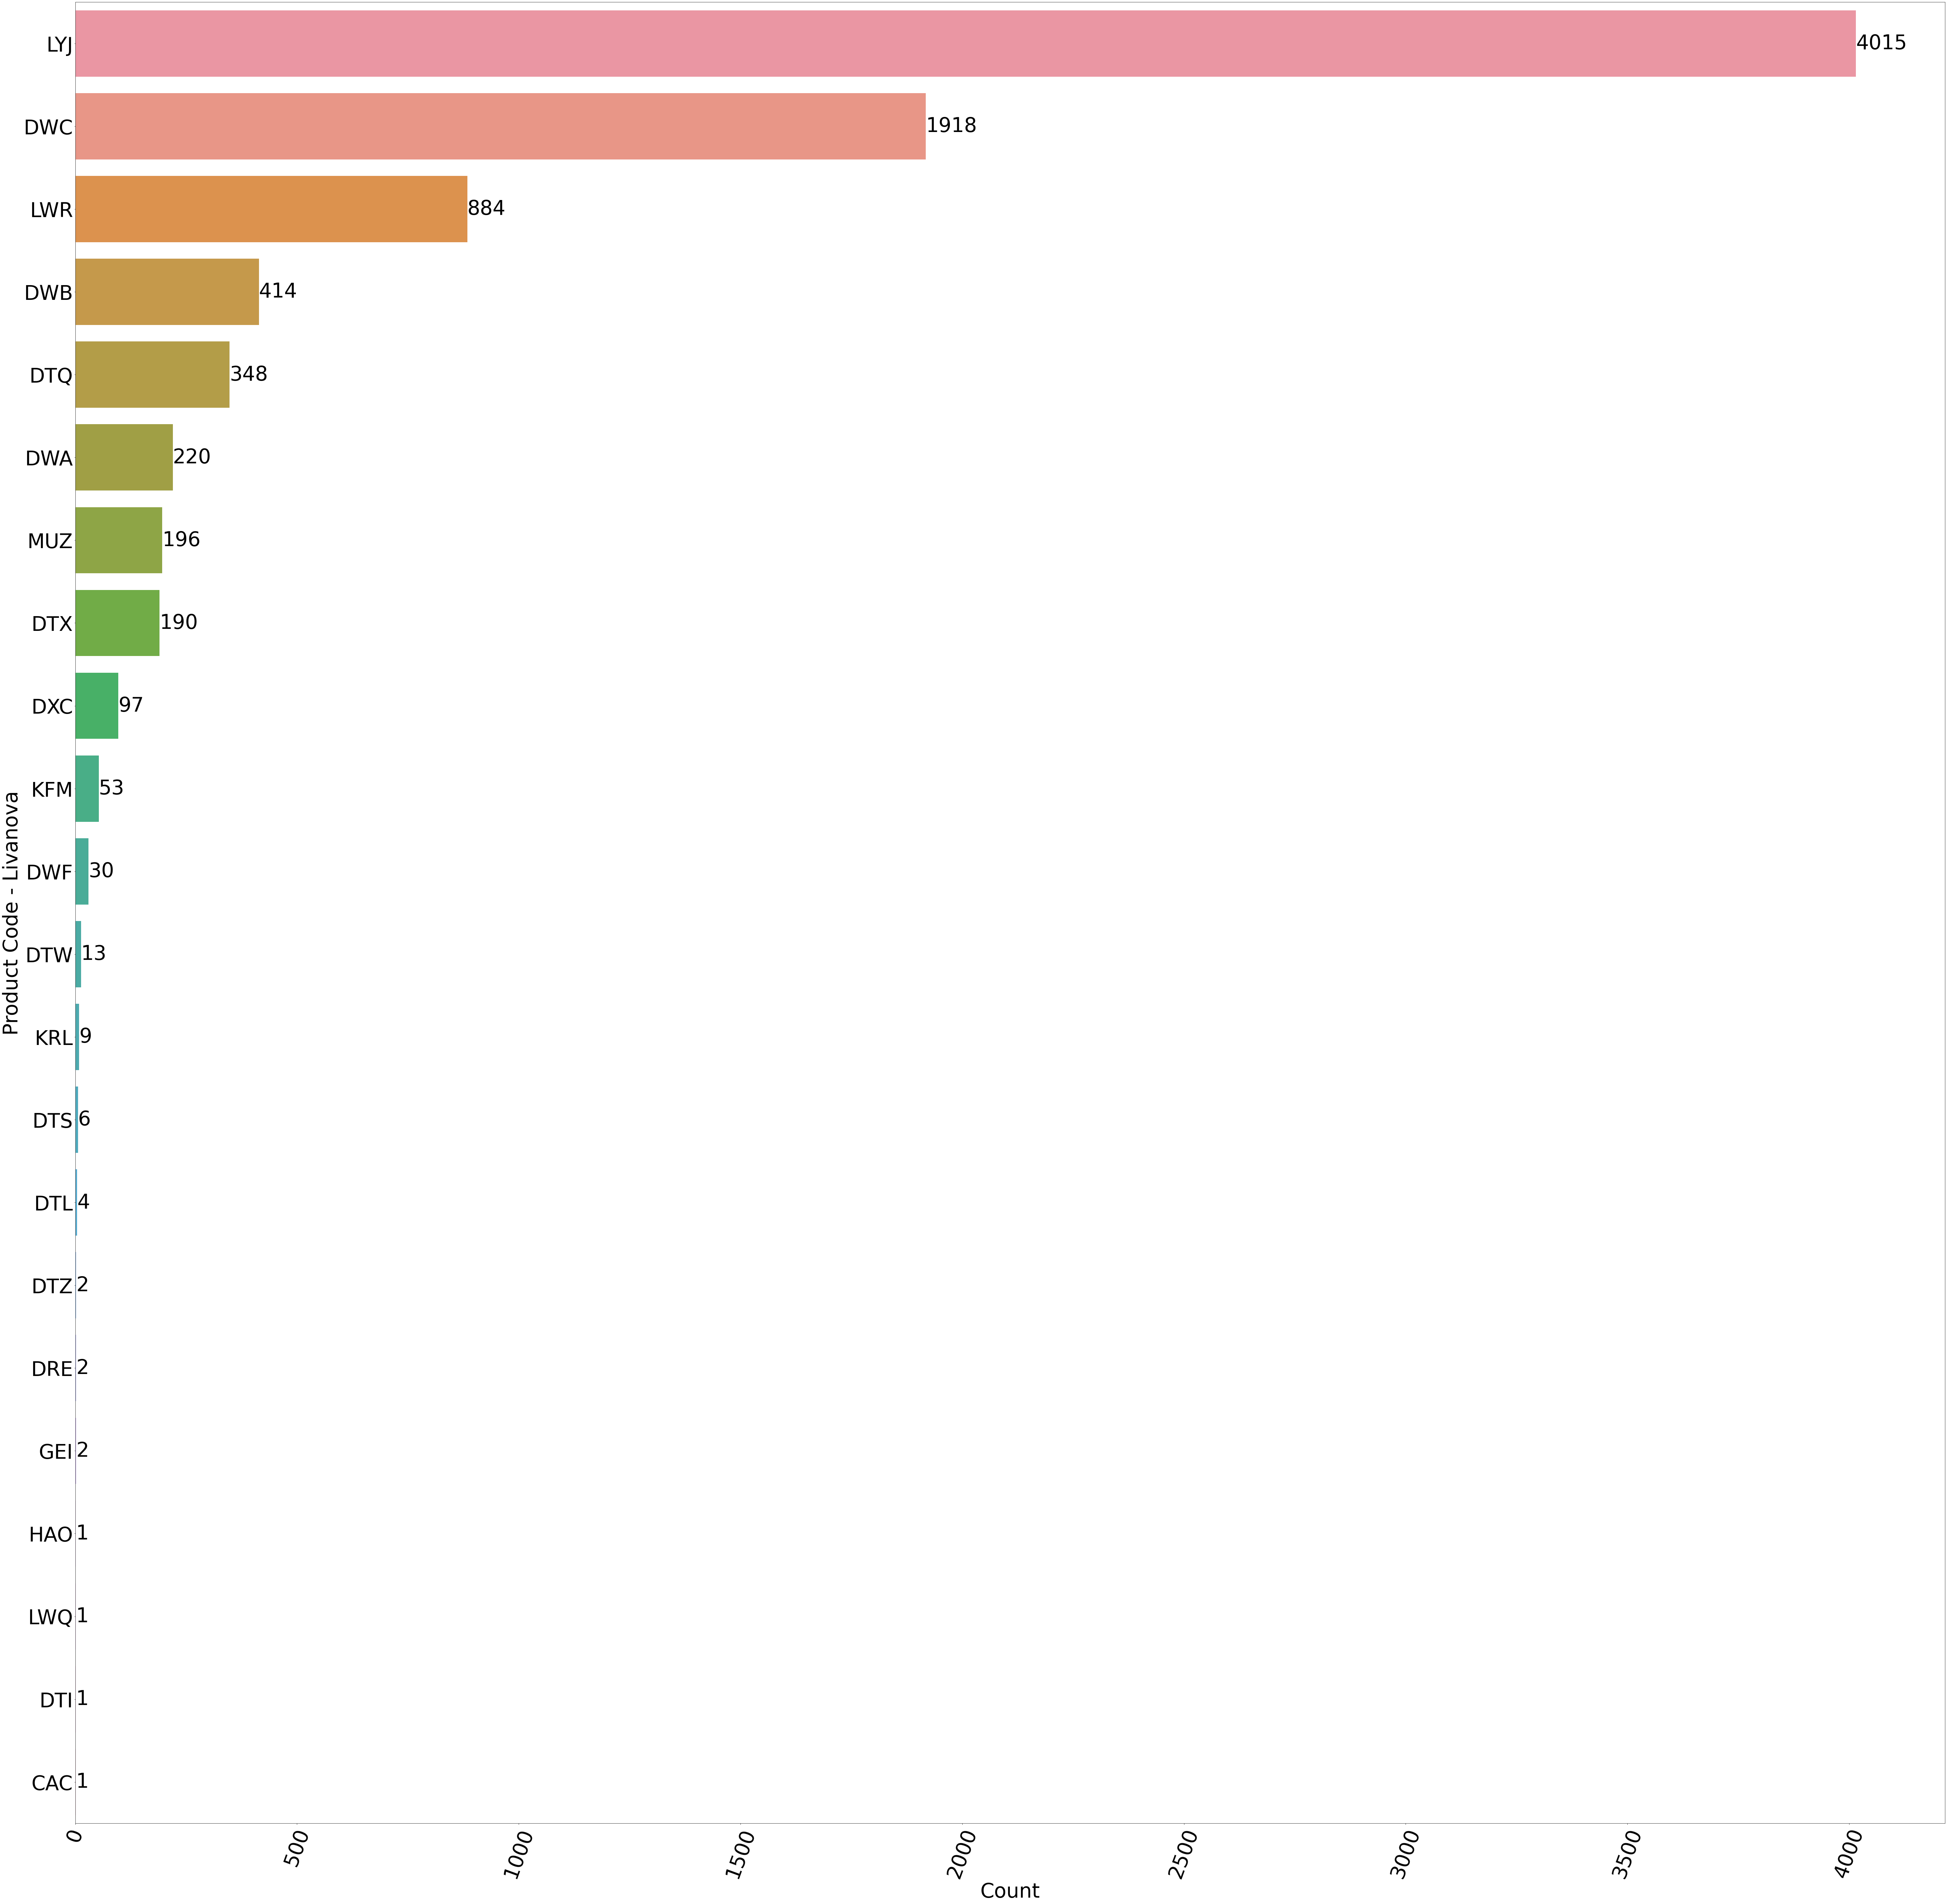

In [71]:
ax=sns.barplot(maude_livanova["product_code"].sort_values(ascending=True).value_counts()[0:50],maude_livanova["product_code"].sort_values(ascending=True).value_counts()[0:50].index)
ax.bar_label(ax.containers[0])
plt.rcParams["figure.figsize"] = (100,100)
plt.rcParams.update({'font.size': 60})
plt.xticks(rotation=70)
plt.xlabel("Count")
plt.ylabel("Product Code - Livanova")

/Users/sahithimuddana/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Product Code - Boston Scientific')

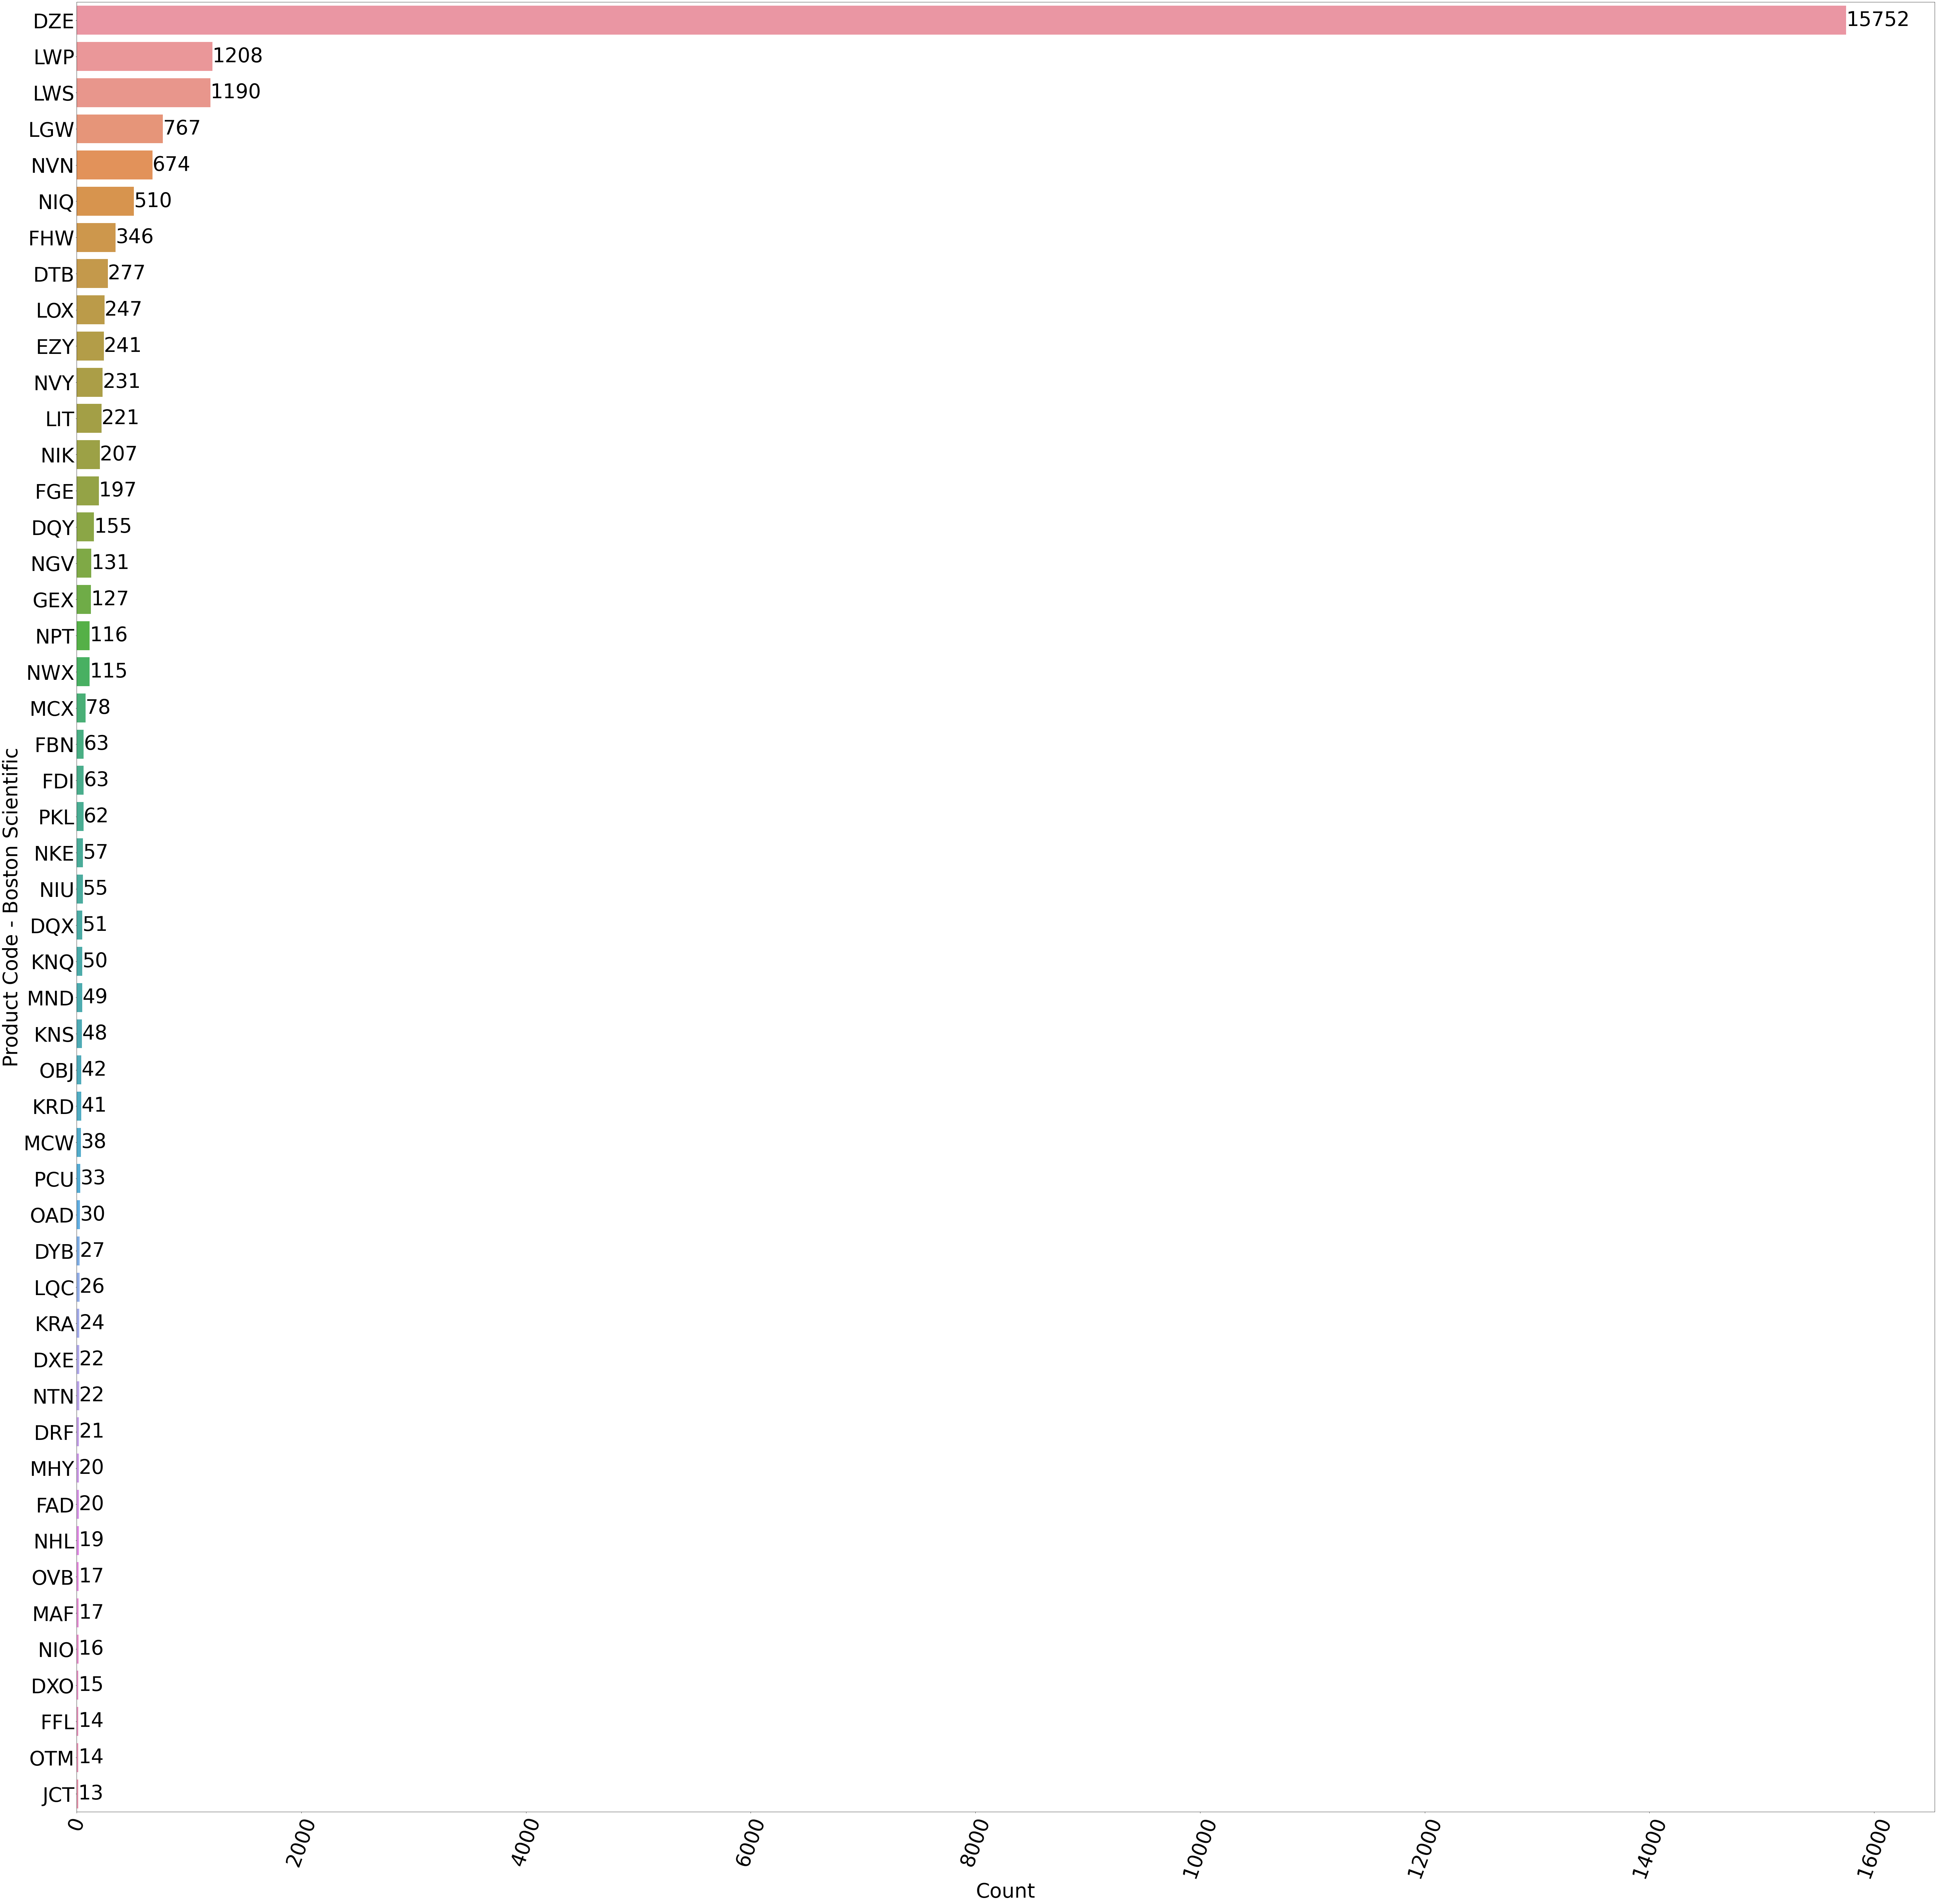

In [72]:
ax=sns.barplot(maude_boston_scientific["product_code"].sort_values(ascending=True).value_counts()[0:50],maude_boston_scientific["product_code"].sort_values(ascending=True).value_counts()[0:50].index)
ax.bar_label(ax.containers[0])
plt.rcParams["figure.figsize"] = (100,100)
plt.rcParams.update({'font.size': 60})
plt.xticks(rotation=70)
plt.xlabel("Count")
plt.ylabel("Product Code - Boston Scientific")

/Users/sahithimuddana/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Product Code - Competitors')

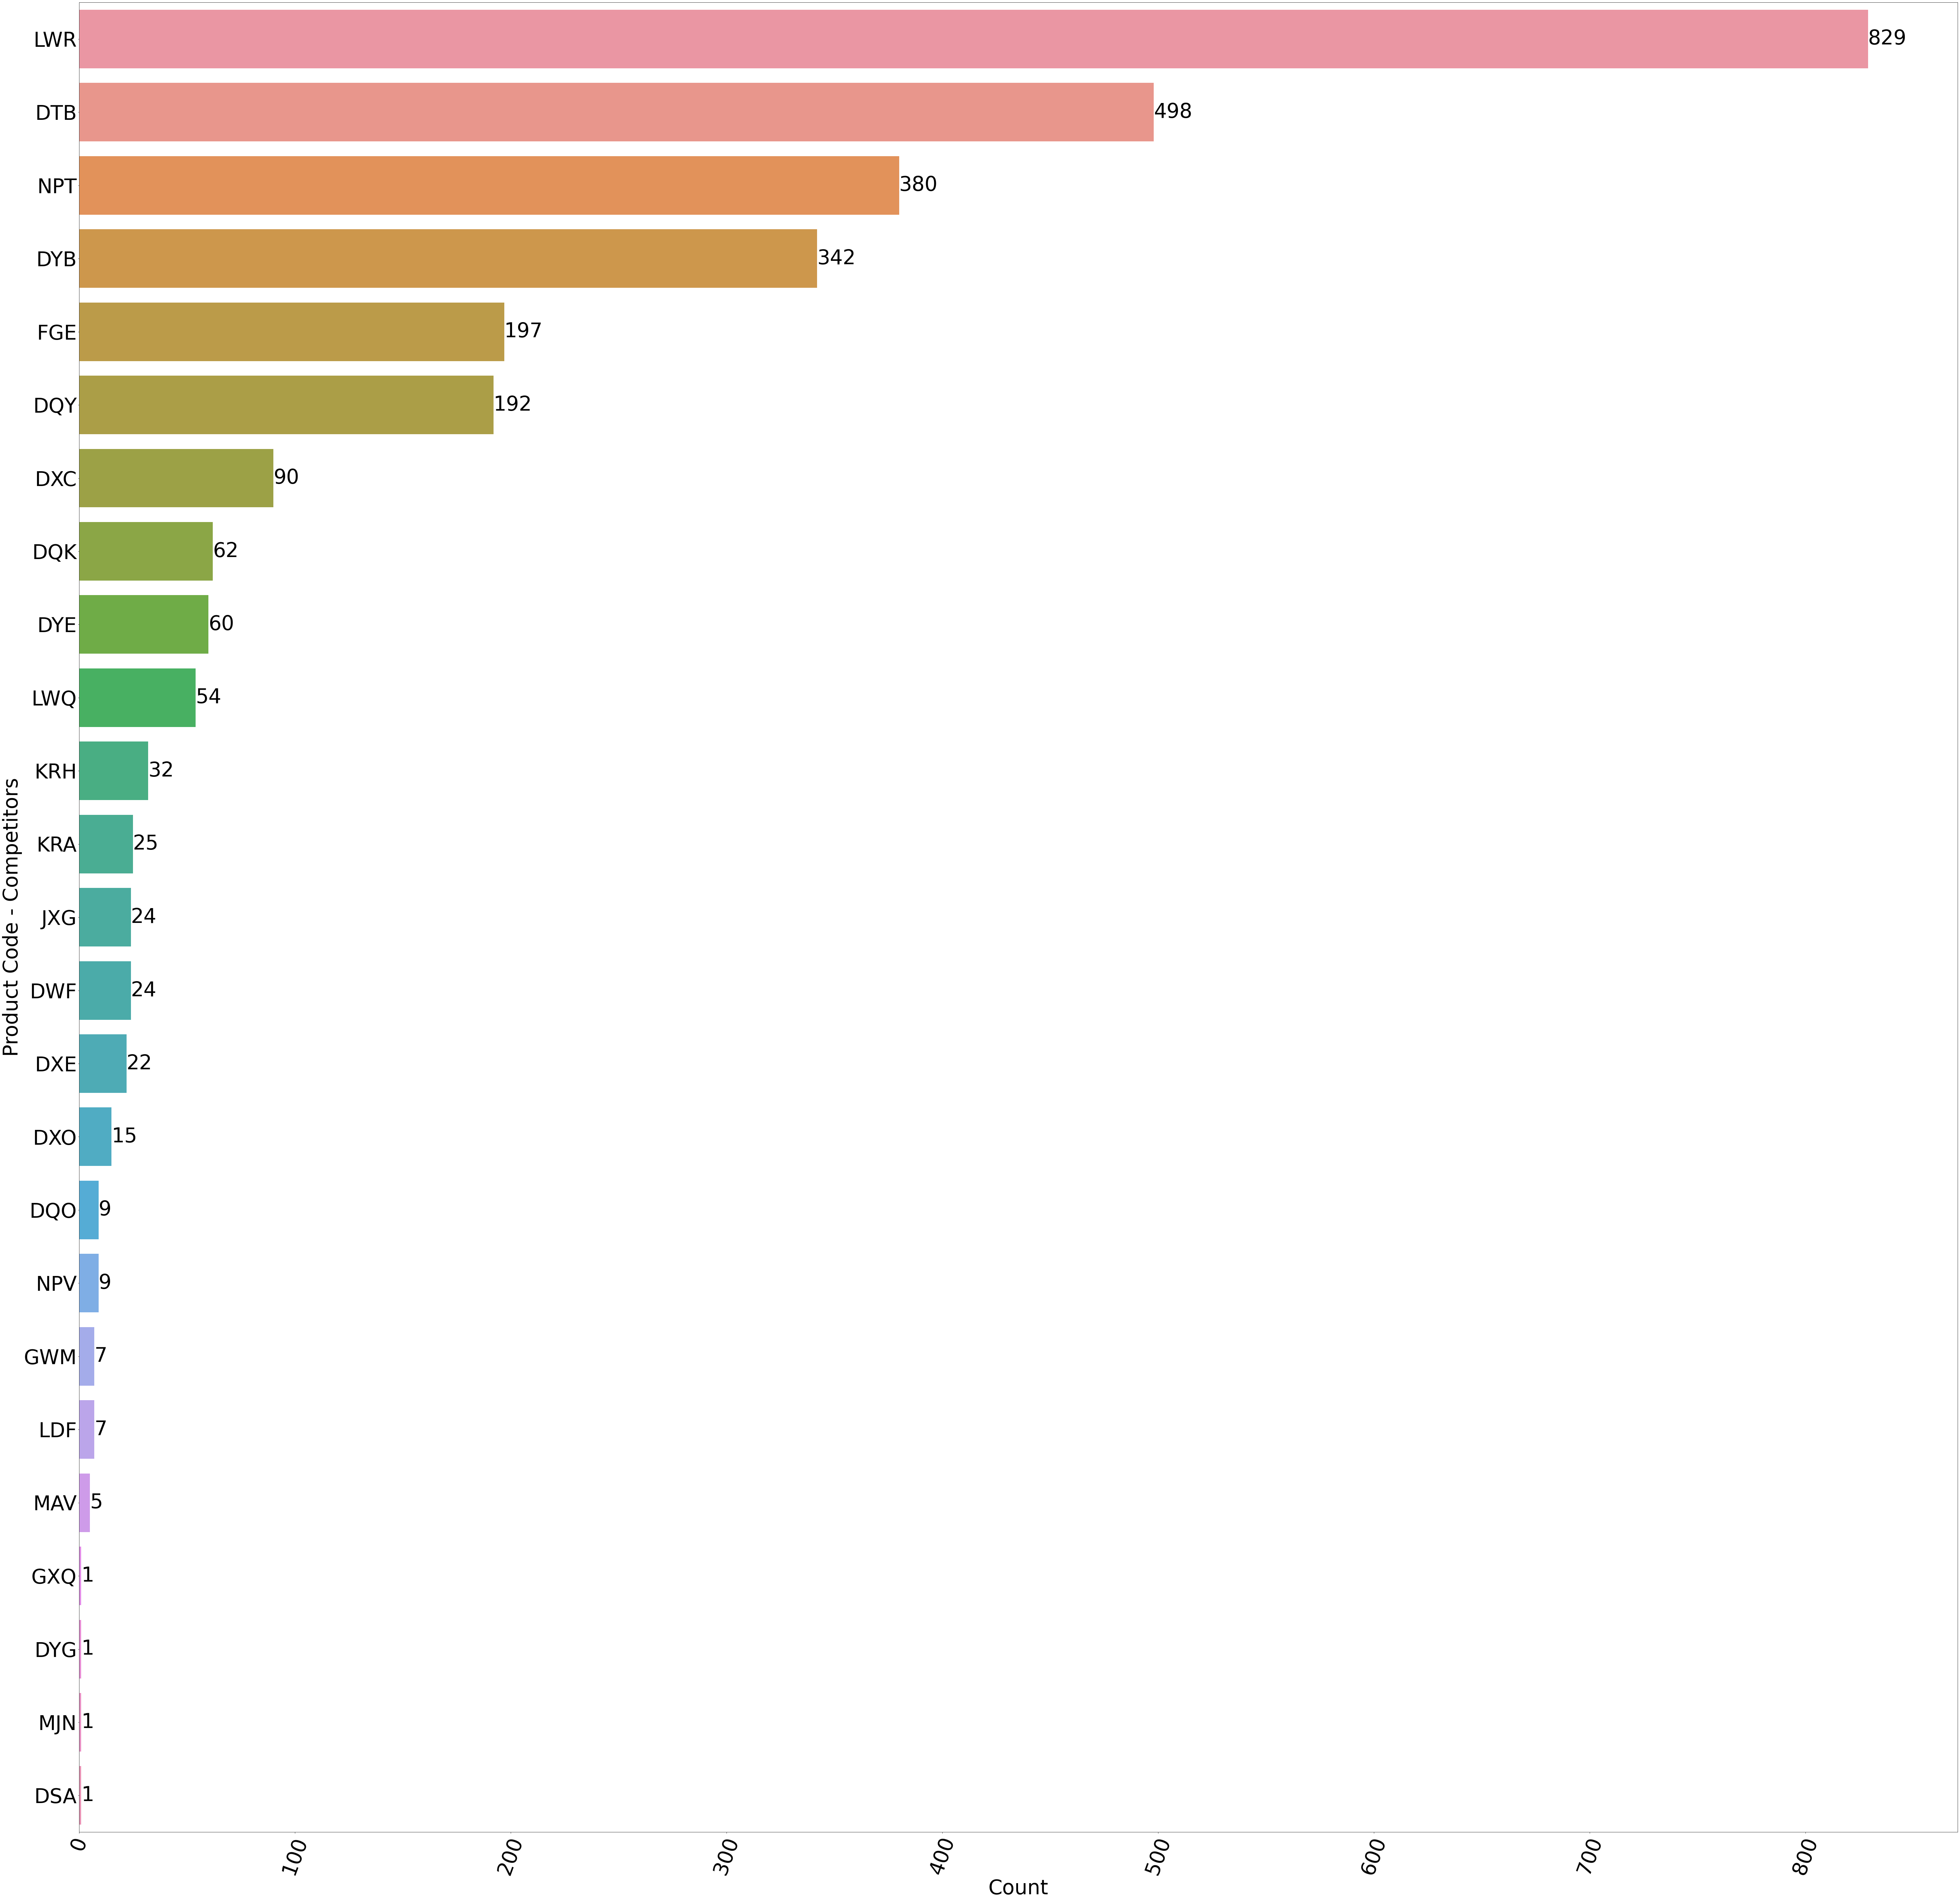

In [73]:
ax=sns.barplot(appended_data["product_code"].sort_values(ascending=True).value_counts()[0:50],appended_data["product_code"].sort_values(ascending=True).value_counts()[0:50].index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=70)
plt.xlabel("Count")
plt.ylabel("Product Code - Competitors")

## Insight：
After combining all the competitors, I found that they have the most problems with LGW, OZP, OYC, but the good thing is that Edwards doesn't face these problems.

## Observing Product Problems

In [74]:
product_problem_DQY=appended_data[appended_data['product_code']=='DQY']['product_problem']
product_problem_DQY.value_counts().to_frame()

,product_problem
Material Rupture,94
Adverse Event Without Identified Device or Use Problem,30
Detachment of Device or Device Component,7
Failure to Advance,6
Break,5
Material Deformation,5
Entrapment of Device,4
Inflation Problem,2
"Activation, Positioning or SeparationProblem",2
Mechanical Problem,2


In [75]:
product_problem1=appended_data[appended_data['product_code']==appended_data['product_code'].sort_values(ascending=True).value_counts().
                       index[1]]['product_problem']
product_problem1.value_counts().to_frame()

,product_problem
Adverse Event Without Identified Device or Use Problem,101
Under-Sensing,37
High Capture Threshold,28
Over-Sensing,19
High impedance,18
...,...
"Over-Sensing, Impedance Problem",1
Unstable Capture Threshold,1
"Under-Sensing, Low impedance, High Capture Threshold",1
"Positioning Failure, Material Integrity Problem",1


In [76]:
product_problem2=appended_data[appended_data['product_code']==appended_data["product_code"].sort_values(ascending=True).value_counts().
                       index[2]]['product_problem']
product_problem2.value_counts().to_frame()

,product_problem
Adverse Event Without Identified Device or Use Problem,154
Insufficient Information,42
Device Dislodged or Dislocated,28
Perivalvular Leak,27
"Perivalvular Leak, Device Dislodged or Dislocated",16
...,...
"Inaccurate Delivery, Device Dislodged or Dislocated",1
Difficult or Delayed Positioning,1
"Difficult or Delayed Positioning, Material Separation, Difficult to Advance",1
"Perivalvular Leak, Activation Failure",1


In [80]:
appended_data.groupby(['product_problem','product_code']).size().sort_values(ascending=False).to_frame()

0
product_problem                                    prodcut_code     
Adverse Event Without Identified Device or Use ... NPT           154
Insufficient Information                           LWR           144
Adverse Event Without Identified Device or Use ... DTB           101
Material Rupture                                   DQY            94
Fluid Leak                                         DYB            82
...                                                              ...
Difficult to Remove, Material Separation, Separ... NPT             1
Difficult to Remove, Material Rupture              FGE             1
                                                   DQY             1
Difficult to Remove, Human-Device Interface Pro... DYB             1
Use of Incorrect Control Settings                  DQK             1

[715 rows x 1 columns]

## Insight：
The most common problem with the competitors' products is the OZP " Patient Device Interaction Problem".

In [81]:
appended_data['product_problem'].value_counts().sort_values(ascending=False).to_frame()[0:10]

,product_problem
Adverse Event Without Identified Device or Use Problem,404
Insufficient Information,255
Material Rupture,172
Fluid Leak,85
Gas Leak,76
Patient-Device Incompatibility,67
Perivalvular Leak,67
Appropriate Term/Code Not Available,58
Device Dislodged or Dislocated,53
Difficult to Open or Close,46


In [82]:
maude_edwards['product_problem'].value_counts().sort_values(ascending=False).to_frame()

,product_problem
Adverse Event Without Identified Device or Use Problem,3909
Insufficient Information,1924
Gradient Increase,798
"Adverse Event Without Identified Device or Use Problem, Insufficient Information",498
"Fluid Leak, Gradient Increase",386
...,...
"Fluid Leak, Inflation Problem, Material Rupture, Material Split, Cut or Torn",1
"Entrapment of Device, Structural Problem, Appropriate Term/Code Not Available, Material Split, Cut or Torn",1
"Perivalvular Leak, Material Puncture/Hole",1
"Restricted Flow rate, Deformation Due to Compressive Stress, Material Deformation, Material Twisted/Bent",1


## Insight：
The most frequently displayed problem with Edwards' products is "Adverse Event Without Identified Device or Use Problem"

In [83]:
description_dqy = appended_data[appended_data["product_code"]=="DQY"]["Event_Description"]

In [84]:
appended_data.groupby(['product_problem','Event_Description']).size().sort_values(ascending=False).to_frame()[0:20]

0
product_problem                                    Event_Description                                     
Adverse Event Without Identified Device or Use ... IT WAS REPORTED THAT THIS RIGHT ATRIAL (RA) LEA...  10
                                                   IT WAS REPORTED THAT THIS RIGHT ATRIAL (RA) LEA...   9
                                                   IT WAS REPORTED THAT THIS RIGHT VENTRICULAR (RV...   7
                                                   THIS REPORT IS TO ADVISE OF AN EVENT OBSERVED D...   6
                                                   MEDTRONIC RECEIVED INFORMATION THAT FOLLOWING T...   4
Insufficient Information                           MEDTRONIC RECEIVED INFORMATION THROUGH A LITERA...   4
Patient-Device Incompatibility                     THE MANUFACTURER RECEIVED INFORMATION ON THE EV...   4
                                                   THE MANUFACTURER RECEIVED INFORMATION ON THE EV...   4
Insufficient Information                           MEDTRONIC RECEIVED INFORMATION THROUGH A LITERA...   4
Adverse Event Without Identified Device or Use ... MEDTRONIC RECEIVED INFORMATION THAT ONE DAY FOL...   4
Fluid Leak                                         DURING THE PROCEDURE, A BLOOD LEAK WAS NOTED FR...   4
Adverse Event Without Identified Device or Use ... IT WAS REPORTED THAT THIS RIGHT ATRIAL (RA) LEA...   4
Perivalvular Leak, Device Dislodged or Dislocated  MEDTRONIC RECEIVED INFORMATION VIA LITERATURE R...   3
Difficult to Open or Close                         LIVANOVA (B)(4) RECEIVED A REPORT THAT A ELECTR...   3
Insufficient Information                           MEDTRONIC RECEIVED INFORMATION THROUGH A LITERA...   3
Device Operational Issue                           LIVANOVA (B)(4) RECEIVED A REPORT THAT THE ELEC...   3
Adverse Event Without Identified Device or Use ... MEDTRONIC RECEIVED INFORMATION THAT TWO DAYS FO...   3
                                                   IT WAS REPORTED THAT THIS RIGHT VENTRICULAR (RV...   3
                                                   IT WAS REPORTED THAT DURING THE IMPLANT PROCEDU...   2
                                                   IT WAS REPORTED THAT DURING THE IMPLANT PROCEDU...   2

In [85]:
appended_data['Event_Description'].value_counts().to_frame()

,Event_Description
IT WAS REPORTED THAT THIS RIGHT ATRIAL (RA) LEAD WAS PART OF A SYSTEM REVISION DUE TO INFECTION WITH SEPSIS. THERE WERE NO ADDITIONAL ADVERSE PATIENT EFFECTS REPORTED. THE RA LEAD WAS EXPLANTED.,10
IT WAS REPORTED THAT THIS RIGHT ATRIAL (RA) LEAD WAS PART OF A SYSTEM REVISION DUE TO INFECTION. THERE WERE NO ADDITIONAL ADVERSE PATIENT EFFECTS REPORTED. THE RA LEAD WAS EXPLANTED.,9
IT WAS REPORTED THAT THIS RIGHT VENTRICULAR (RV) LEAD WAS PART OF A SYSTEM REVISION DUE TO INFECTION. THERE WERE NO ADDITIONAL ADVERSE PATIENT EFFECTS REPORTED. THE RV LEAD WAS EXPLANTED.,7
THIS REPORT IS TO ADVISE OF AN EVENT OBSERVED DURING ANALYSIS.,6
"MEDTRONIC RECEIVED INFORMATION THAT ONE DAY FOLLOWING THE IMPLANT OF THIS TRANSCATHETER BIOPROSTHETIC VALVE, A PERMANENT PACEMAKER WAS IMPLANTED DUE TO COMPLETE HEART BLOCK (CHB). NO ADDITIONAL ADVERSE PATIENT EFFECTS WERE REPORTED.",4
...,...
"IT WAS REPORTED THAT THE ATRIAL AND RIGHT VENTRICULAR LEADS CHRONICALLY EXHIBITED LOW LEAD IMPEDANCE. THE PATIENT DID NOT EXPERIENCE ANY SYMPTOMS AS A RESULT OF THE LOW LEAD IMPEDANCE ANOMALY. ON (B)(6) 2020, THE LEADS WERE CAPPED AND REPLACED SUCCESSFULLY DURING A SCHEDULED PULSE GENERATOR CHANGE PROCEDURE. THE PATIENT'S CONDITION REMAINED STABLE THROUGHOUT THE PROCEDURE. RELATED MANUFACTURER REFERENCE NUMBER: 2017865-2020-08133.",1
"ON (B)(6) 2011, A 25 MM TRIFECTA VALVE WAS IMPLANTED. ON (B)(6) 2019, THE PATIENT EXPERIENCED A RIGHT SIDED STROKE. MEDICATION WAS ADMINISTRATED. ON (B)(6) 2019, MODERATE STENOSIS AND SEVERE SCLEROSIS OF THE AORTIC VALVE WAS REPORTED. THE PATIENT WAS HOSPITALIZED AND A THROMBOLYSIS AND FRUSTRANEOUS INTERVENTIONAL THROMBECTOMY WAS PERFORMED. THE VALVE REMAINS IMPLANTED. THE PATIENT WAS REPORTED TO BE STABLE CONDITION",1
"ON (B)(6) 2015 A 21MM TRIFECTA VALVE WAS IMPLANTED. ON (B)(6) 2020, THE VALVE WAS EXPLANTED DUE TO CALCIFICATION AND WAS REPLACED WITH A 21MM MEGNA EASE. PRIOR TO EXPLANT THE PATIENT WAS EXPERIENCING FATIGUE. THE PATIENT WAS REPORTED TO BE IN STABLE CONDITION.",1
"RELATED MANUFACTURING REF: 3008452825-2020-00321, 3008452825-2020-00323. DURING A PERSISTENT ATRIAL FIBRILLATION ABLATION PROCEDURE, A CARDIAC TAMPONADE AND DISSECTION OCCURRED. DIFFICULTY WAS NOTED DURING CATHETERIZATION OF THE VEIN OF MARSHALL AND A CORONARY SINUS DISSECTION OCCURRED. WHEN APPLYING THE 4TH RF APPLICATION ON THE MITRAL ISTHMUS, THE PATIENT¿S BLOOD PRESSURE COLLAPSED AND AN ECHOCARDIOGRAM REVEALED A CARDIAC TAMPONADE. A PERICARDIOCENTESIS WAS PERFORMED, HOWEVER THE PATIENT WAS UNSTABLE. THERE WERE NO PERFORMANCE ISSUES WITH ANY ABBOTT DEVICES.",1


In [87]:
#!pip install spacy
#!pip install pyLDAvis
#!pip install --upgrade gensim

In [88]:
#!pip3 install nltk

In [89]:
#!pip3 install -U scikit-learn scipy matplotlib

In [1]:
!pip install pyLDAvis

In [ ]:
import re
import numpy as np
import pandas as pd
import nltk
import sklearn
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as plt_gensim # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [1]:
from nltk.corpus import stopwords

In [2]:
from nltk.stem import PorterStemmer

In [3]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [5]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))

def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in df['Event_Description']:
        
        words=[w for w in word_tokenize(news) if (w not in stop)]
        
        words1=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words1)

        return corpus

corpus=preprocess_news(appended_data)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sahithimuddana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sahithimuddana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sahithimuddana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'appended_data' is not defined

In [ ]:
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 5, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.022*"VALVE" + 0.022*"THE" + 0.022*"WAS" + 0.022*"BIOPROSTHETIC" + 0.022*"THAT" + 0.022*"AND" + 0.022*"PATIENT" + 0.022*"MEDTRONIC" + 0.022*"REPORTED" + 0.022*"WITH"'),
 (1,
  '0.022*"THE" + 0.022*"VALVE" + 0.022*"WAS" + 0.022*"BIOPROSTHETIC" + 0.022*"THAT" + 0.022*"PATIENT" + 0.022*"AND" + 0.022*"REPORTED" + 0.022*"ACUTE" + 0.022*"CULTURED"'),
 (2,
  '0.084*"WAS" + 0.084*"THE" + 0.070*"VALVE" + 0.030*"AND" + 0.030*"REPORTED" + 0.030*"PATIENT" + 0.030*"THAT" + 0.030*"BIOPROSTHETIC" + 0.016*"ADVERSE" + 0.016*"THROUGH"'),
 (3,
  '0.022*"VALVE" + 0.022*"THE" + 0.022*"HIGH" + 0.022*"INFORMATION" + 0.022*"WAS" + 0.022*"VISIT" + 0.022*"MEDTRONIC" + 0.022*"UPON" + 0.022*"ADDITIONAL" + 0.022*"THIS"'),
 (4,
  '0.023*"WAS" + 0.023*"THE" + 0.022*"VALVE" + 0.022*"BIOPROSTHETIC" + 0.022*"THAT" + 0.022*"PATIENT" + 0.022*"REPORTED" + 0.022*"AND" + 0.022*"SURGICAL" + 0.022*"THIS"')]

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
2     -0.028013  0.0       1        1  98.786648
4      0.006223  0.0       2        1   0.303347
1      0.007194  0.0       3        1   0.303336
0      0.007240  0.0       4        1   0.303335
3      0.007356  0.0       5        1   0.303334, topic_info=             Term      Freq     Total Category  logprob  loglift
35            THE  5.000000  5.000000  Default  30.0000  30.0000
42            WAS  5.000000  5.000000  Default  29.0000  29.0000
40          VALVE  4.000000  4.000000  Default  28.0000  28.0000
8   BIOPROSTHETIC  1.000000  1.000000  Default  27.0000  27.0000
34           THAT  1.000000  1.000000  Default  26.0000  26.0000
..            ...       ...       ...      ...      ...      ...
26          NOTED  0.004286  1.055909   Topic5  -3.8286   0.2913
13   ENDOCARDITIS  0.004286  1.055841   Topic5  -3.8286   0.2914
8   BIOPROSTHETIC  0.004286  1.920800   Topic5  -3.8286  -0.3070
1           ACUTE  0.004286  1.055884   Topic5  -3.8286   0.2914
4         ADVERSE  0.004286  1.056084   Topic5  -3.8286   0.2912

[219 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
0         1  0.947258            ACROSS
1         1  0.947074             ACUTE
2         1  0.947368        ADDITIONAL
3         1  0.947457          ADMITTED
4         1  0.946894           ADVERSE
5         1  0.947334             AFTER
6         1  1.040977               AND
7         1  0.947163     APPROXIMATELY
8         1  1.041233     BIOPROSTHETIC
9         1  0.947408           CONDUIT
10        1  0.947397          CULTURED
11        1  0.947023         DIAGNOSED
12        1  0.947198           EFFECTS
13        1  0.947113      ENDOCARDITIS
14        1  0.947056            ERODED
15        1  0.947334         EXPLANTED
16        1  0.947418            FOLLOW
17        1  0.947154         FOLLOWING
18        1  0.947299              FOUR
19        1  0.947170          GRADIENT
20        1  0.947248               HAD
21        1  0.947371              HIGH
22        1  0.947527           IMPLANT
23        1  0.947643       INFORMATION
24        1  0.947291  INTRAOPERATIVELY
25        1  0.947365         MEDTRONIC
26        1  0.947051             NOTED
27        1  1.041086           PATIENT
28        1  0.947092         PULMONARY
29        1  0.947323          RECEIVED
30        1  0.947133          REPLACED
31        1  1.041048          REPORTED
32        1  0.947226    STAPHYLOCOCCUS
33        1  0.947669          SURGICAL
34        1  1.041159              THAT
35        1  0.929160               THE
36        1  0.947698              THIS
37        1  0.946997           THROUGH
38        1  0.947138     TRANSCATHETER
39        1  0.947146              UPON
40        1  0.885626             VALVE
41        1  0.947349             VISIT
42        1  0.929088               WAS
43        1  0.947165              WERE
44        1  0.947403              WITH
45        1  0.947239             YEARS, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 2, 1, 4])